# IMAGEN - ERROR ANALYSIS
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

Such in-depth understanding can be achieved by performing follow-up analysis such as: <br>

## Overview

## Error Analysis

In [1]:
################################################################################
""" IMAGEN - ERROR ANALYSIS """
# Author : JiHoon Kim, <jihoon.kim@fu-berlin.de>, 21th September 2021
#
%load_ext autoreload
%autoreload 2

import pandas as pd 
import numpy as np
from glob import glob
from os.path import join 
import os 
from scikits.bootstrap import ci
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# import joypy
# %matplotlib inline

from plotResults import *

In [2]:
from imagen_instrumentloader import *
from imagen_plot_statistics import *

In [3]:
def violin_plot(DATA, ROI):
    for col in ROI:
        sns.set(style="whitegrid", font_scale=1)
        fig, axes = plt.subplots(nrows=1, ncols=len(DATA), figsize = ((len(DATA)+1)**2, len(DATA)+1))
        fig.suptitle(f'{col}', fontsize=15)
        for i, (Key, DF) in enumerate(DATA):
            axes[i].set_title(f'{Key} = {str(len(DF[col].dropna()))}')
            sns.violinplot(x="Class", y=col, data = DF, order=['HC', 'AAM'],
                           inner="quartile", ax = axes[i], palette="Set2")
            add_stat_annotation(ax = axes[i], data=DF, x="Class", y=col,
                                box_pairs = [("HC","AAM")], order=["HC","AAM"],
                                test='t-test_ind', text_format='star', loc='inside')

### Load the run.csv

In [4]:
DF = pd.read_csv('newlbls-fu3-espad-fu3-19a-binge-n650_val_run.csv')

In [5]:
# Model
binge_ML = DF.groupby('Model')
# Logistic Rregression
binge_ML_LR = binge_ML.get_group("('X', 'Binge', 'cb', 'LR')")
binge_ML_LR_T = binge_ML_LR[['ID','T']].dropna(axis=0)
binge_ML_LR_F = binge_ML_LR[['ID','F']].dropna(axis=0)
LR_T = binge_ML_LR_T['ID'].values.tolist()
LR_F = binge_ML_LR_F['ID'].values.tolist()
# Linear SVM
binge_ML_SVM_lin = binge_ML.get_group("('X', 'Binge', 'cb', 'SVM-lin')")
binge_ML_SVM_lin_T = binge_ML_SVM_lin[['ID','T']].dropna(axis=0)
binge_ML_SVM_lin_F = binge_ML_SVM_lin[['ID','F']].dropna(axis=0)
SVM_lin_T = binge_ML_SVM_lin_T['ID'].values.tolist()
SVM_lin_F = binge_ML_SVM_lin_F['ID'].values.tolist()
# Kernel SVM
binge_ML_SVM_rbf = binge_ML.get_group("('X', 'Binge', 'cb', 'SVM-rbf')")
binge_ML_SVM_rbf_T = binge_ML_SVM_rbf[['ID','T']].dropna(axis=0)
binge_ML_SVM_rbf_F = binge_ML_SVM_rbf[['ID','F']].dropna(axis=0)
SVM_rbf_T = binge_ML_SVM_rbf_T['ID'].values.tolist()
SVM_rbf_F = binge_ML_SVM_rbf_F['ID'].values.tolist()
# Gradient Boosting
binge_ML_GB = binge_ML.get_group("('X', 'Binge', 'cb', 'GB')")
binge_ML_GB_T = binge_ML_GB[['ID','T']].dropna(axis=0)
binge_ML_GB_F = binge_ML_GB[['ID','F']].dropna(axis=0)
GB_T = binge_ML_GB_T['ID'].values.tolist()
GB_F = binge_ML_GB_F['ID'].values.tolist()

# CTQ

In [28]:
CTQ = IMAGEN_instrument()
binge_CTQ = CTQ.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_CTQ.csv'
)
col_binge_CTQ = binge_CTQ.columns[:-6]
binge_CTQ_Sex = binge_CTQ.groupby(['Sex'])
binge_CTQ_M = binge_CTQ_Sex.get_group('Male')
binge_CTQ_F = binge_CTQ_Sex.get_group('Female')

In [29]:
DATA = [('All',binge_CTQ), ('Male',binge_CTQ_M), ('Female',binge_CTQ_F)]
ROI = [col_binge_CTQ[-1]]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.223e-03 stat=3.251e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.028e-03 stat=3.117e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=8.576e-01 stat=1.796e-01


Denial sum
Sex    Class            
Female AAM      7.973118
       HC       8.039474
Male   AAM      8.150442
       HC       9.198718

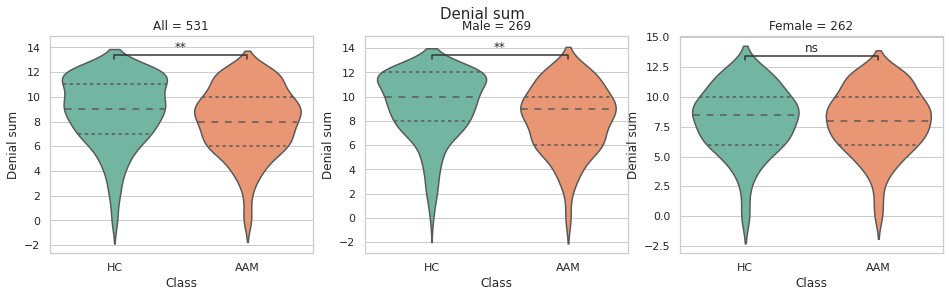

In [30]:
violin_plot(DATA, ROI)
binge_CTQ.groupby(['Sex','Class'])[ROI].mean()

In [31]:
DATA = [('All',binge_CTQ), ('Male',binge_CTQ_M), ('Female',binge_CTQ_F),
        ('GB T',binge_CTQ.set_index('ID').loc[GB_T]), ('GB F',binge_CTQ.set_index('ID').loc[GB_F]),
        ('LR T',binge_CTQ.set_index('ID').loc[LR_T]), ('LR F',binge_CTQ.set_index('ID').loc[LR_F]),
        ('SVM lin T',binge_CTQ.set_index('ID').loc[SVM_lin_T]), ('SVM lin F',binge_CTQ.set_index('ID').loc[SVM_lin_F]),
        ('SVM rbf T',binge_CTQ.set_index('ID').loc[SVM_rbf_T]), ('SVM rbf F',binge_CTQ.set_index('ID').loc[SVM_rbf_F])]
ROI = [col_binge_CTQ[-1]]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.223e-03 stat=3.251e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.028e-03 stat=3.117e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=8.576e-01 stat=1.796e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bo

Denial sum
Sex    Class            
Female AAM      7.973118
       HC       8.039474
Male   AAM      8.150442
       HC       9.198718

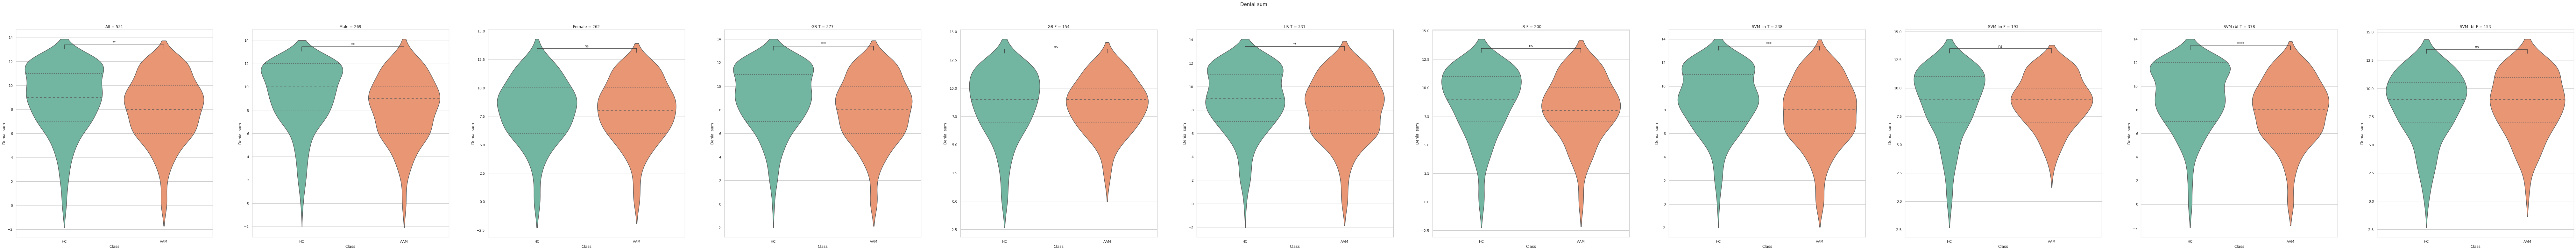

In [32]:
violin_plot(DATA, ROI)
binge_CTQ.groupby(['Sex','Class'])[ROI].mean()

In [ ]:
binge_CTQ_Sex = binge_CTQ.groupby(['Sex'])
binge_CTQ_M = binge_CTQ_Sex.get_group('Male')
binge_CTQ_F = binge_CTQ_Sex.get_group('Female')
binge_CTQ_GB_T = binge_CTQ.set_index('ID').loc[GB_T]
binge_CTQ_GB_T_M = binge_CTQ.set_index('ID').loc[GB_T].groupby(['Sex']).get_group('Male')
binge_CTQ_GB_T_F = binge_CTQ.set_index('ID').loc[GB_T].groupby(['Sex']).get_group('Female')
binge_CTQ_GB_F = binge_CTQ.set_index('ID').loc[GB_F]
binge_CTQ_GB_F_M = binge_CTQ.set_index('ID').loc[GB_F].groupby(['Sex']).get_group('Male')
binge_CTQ_GB_F_F = binge_CTQ.set_index('ID').loc[GB_F].groupby(['Sex']).get_group('Female')

# ('LR T',binge_CTQ.set_index('ID').loc[LR_T]), ('LR F',binge_CTQ.set_index('ID').loc[LR_F]),
# ('SVM lin T',binge_CTQ.set_index('ID').loc[SVM_lin_T]), ('SVM lin F',binge_CTQ.set_index('ID').loc[SVM_lin_F]),
# ('SVM rbf T',binge_CTQ.set_index('ID').loc[SVM_rbf_T]), ('SVM rbf F',binge_CTQ.set_index('ID').loc[SVM_rbf_F])

In [ ]:
DATA = [('All',binge_CTQ),('Male',binge_CTQ_M),('Female',binge_CTQ_F),
        ('GB T',binge_CTQ_GB_T),('GB T M',binge_CTQ_GB_T_M),('GB T F',binge_CTQ_GB_T_F),
        ('GB F',binge_CTQ_GB_F),('GB F M',binge_CTQ_GB_F_M),('GB F F',binge_CTQ_GB_F_F)]
ROI = [col_binge_CTQ[-1]]

In [ ]:
violin_plot(DATA, ROI)
binge_CTQ.groupby(['Sex','Class'])[ROI].mean()

### CTQ

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.223e-03 stat=3.251e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=5.017e-04 stat=3.510e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.478e-01 stat=3.221e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bo

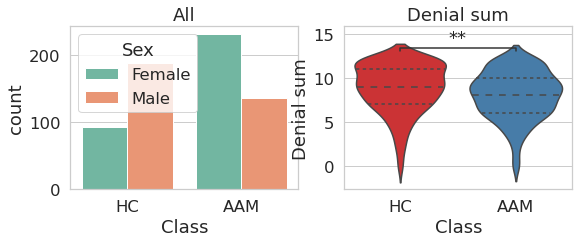

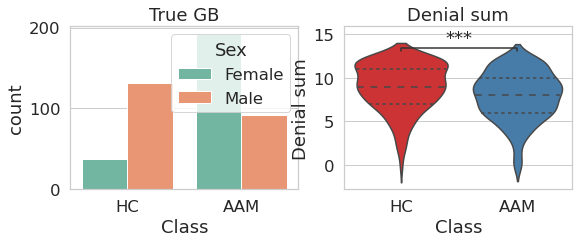

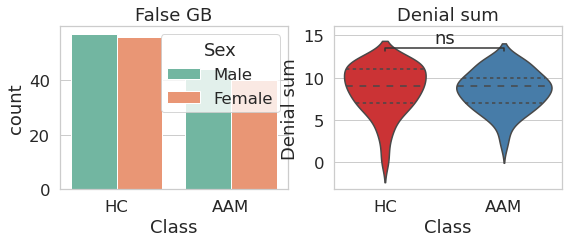

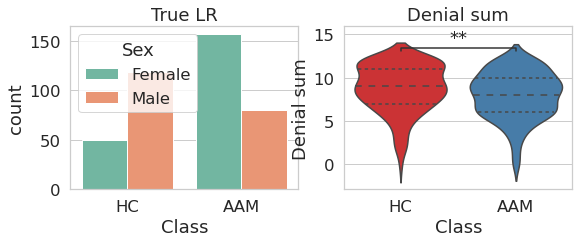

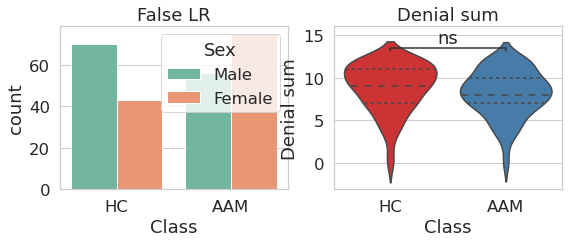

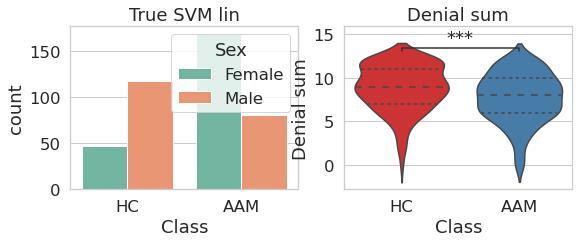

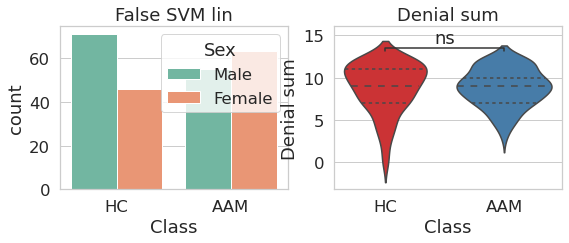

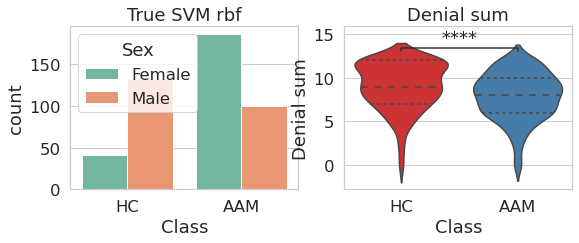

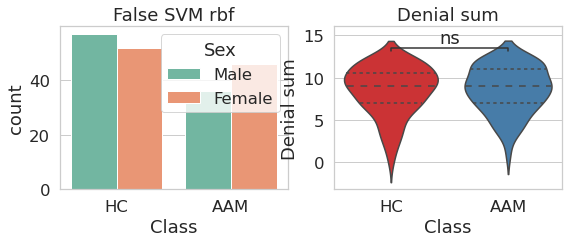

In [11]:
for (S, DF2) in [('All', binge_CTQ),
                ('True GB', binge_CTQ.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_CTQ.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_CTQ.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_CTQ.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_CTQ.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_CTQ.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_CTQ.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_CTQ.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[5:6]
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((2*len(columns)+1)**2, 2*len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

### SURPS

In [12]:
SURPS = IMAGEN_instrument()
binge_SURPS = SURPS.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_SURPS.csv'
)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.854e-01 stat=2.724e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.579e-01 stat=1.132e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.612e-07 stat=-5.164e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with B

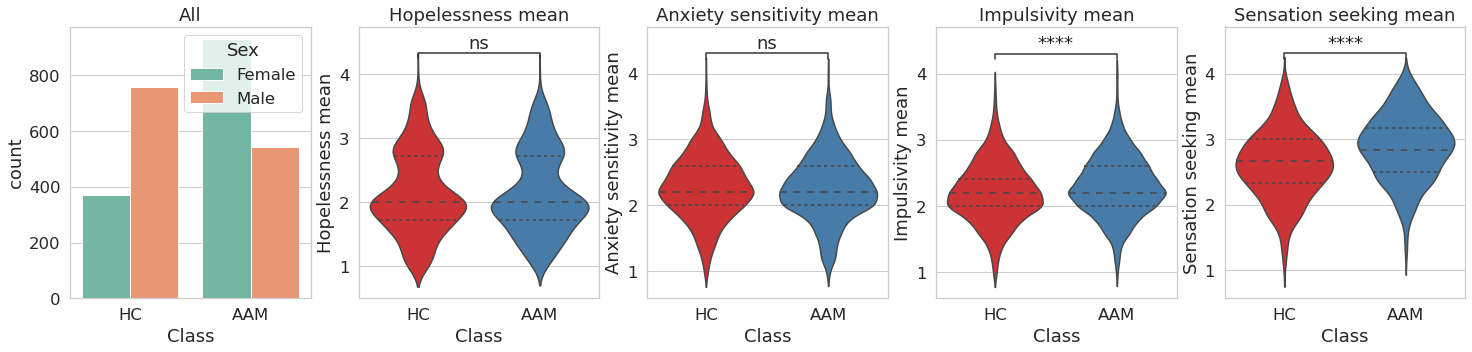

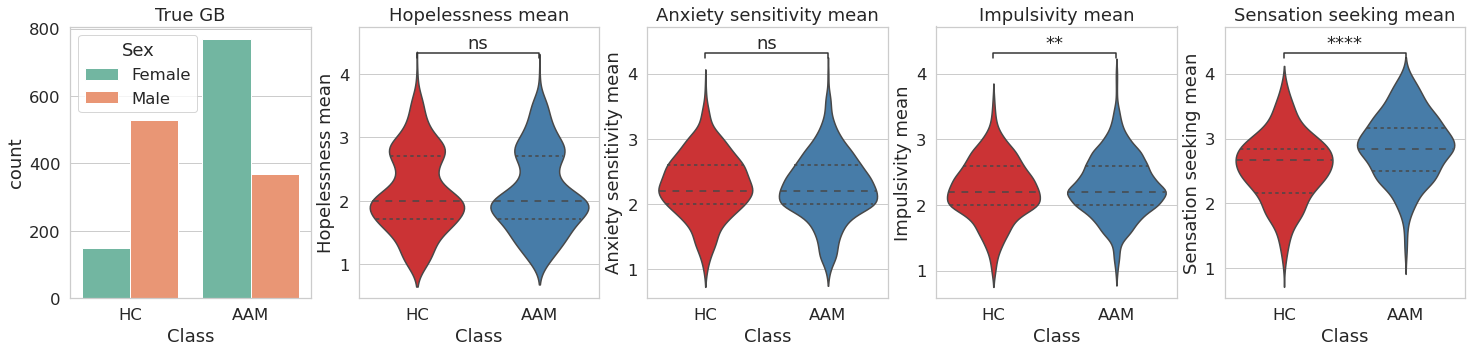

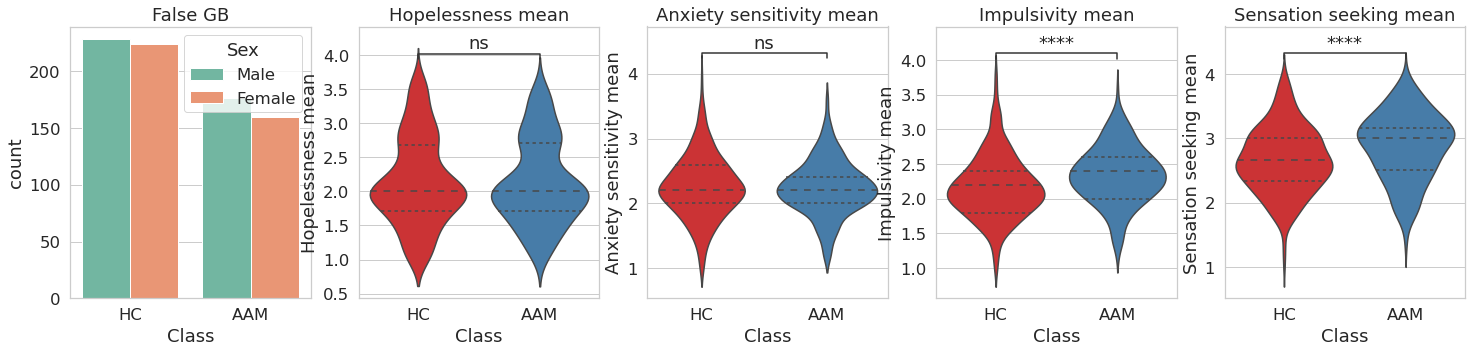

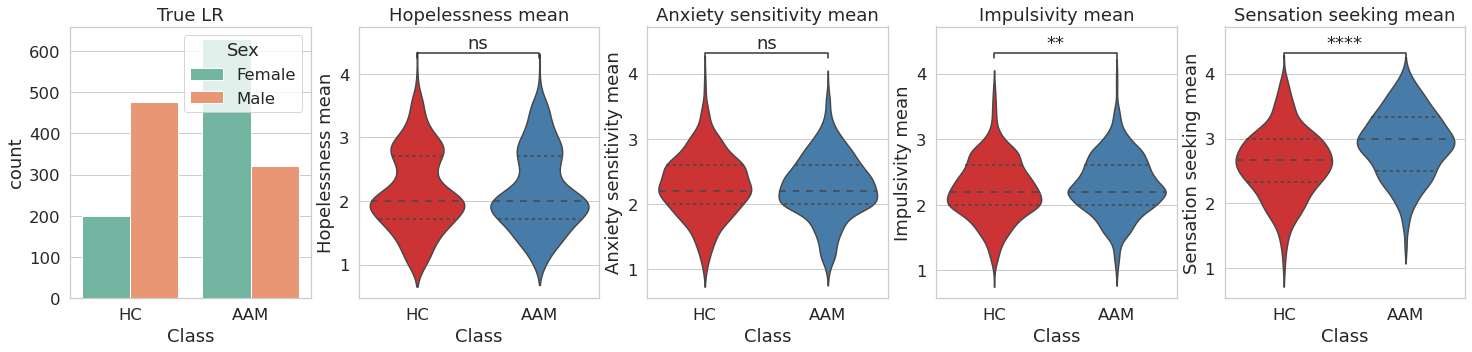

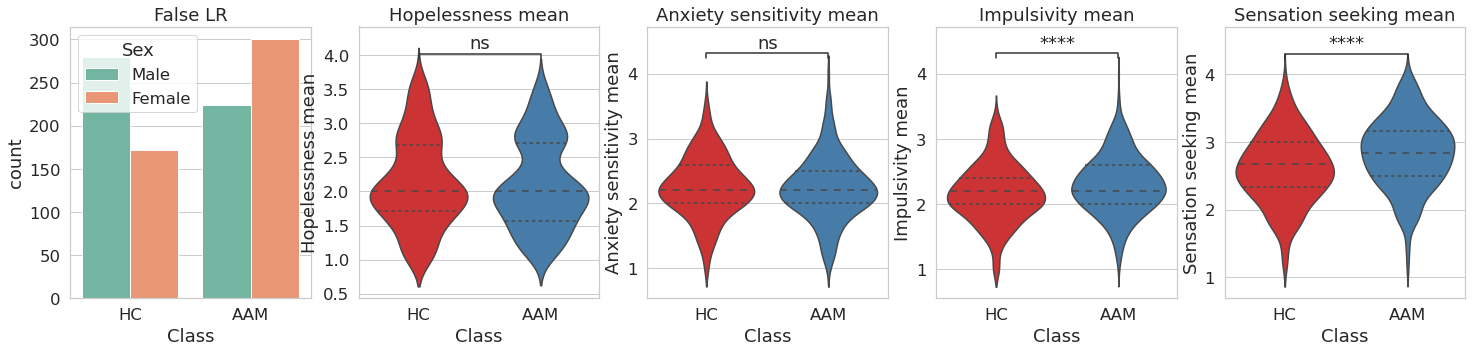

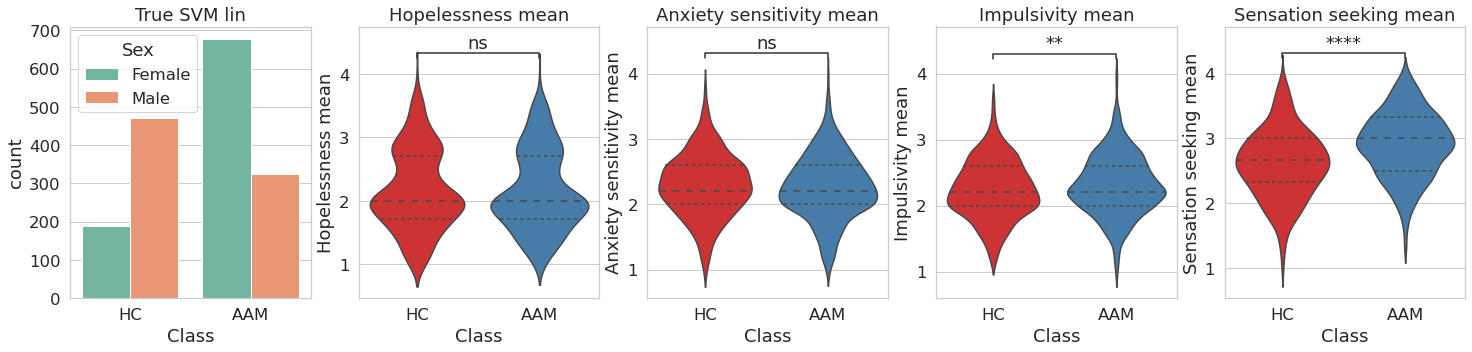

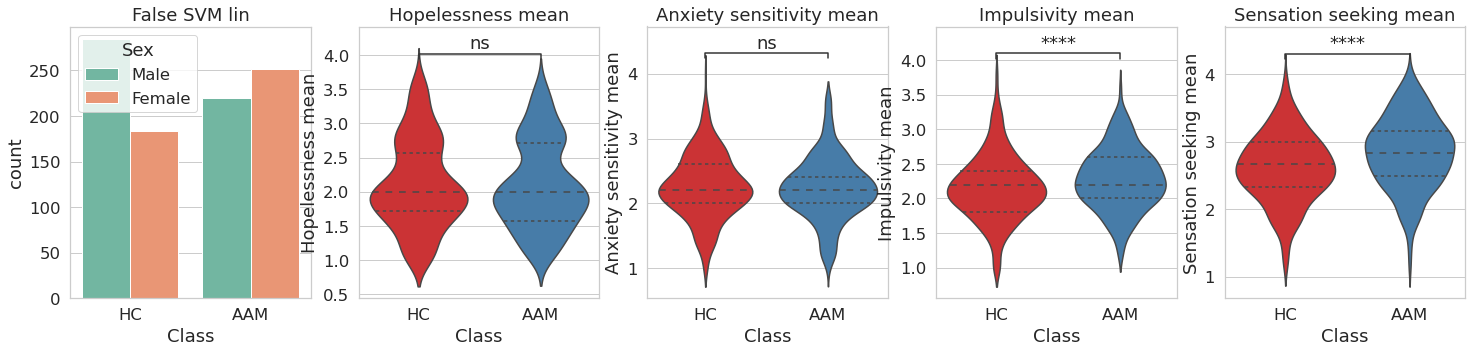

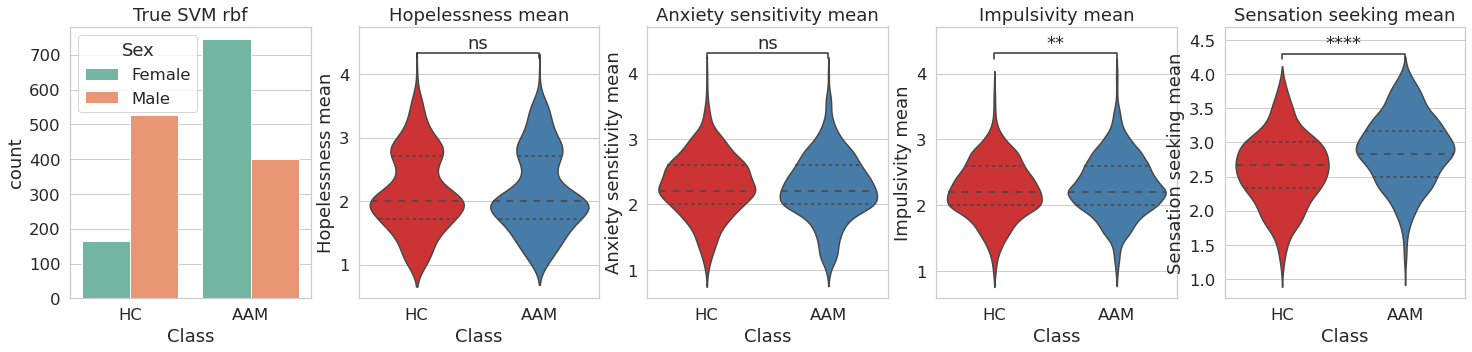

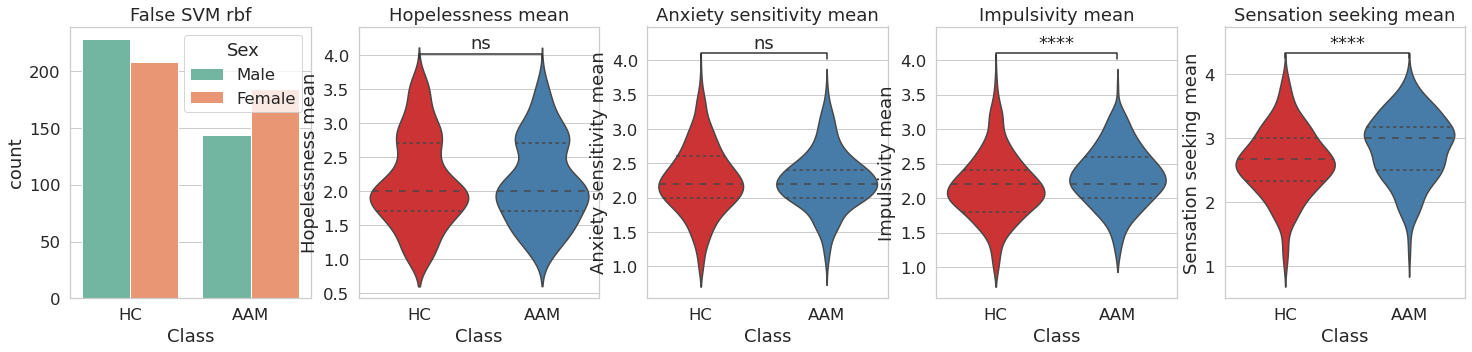

In [13]:
for (S, DF2) in [('All', binge_SURPS),
                ('True GB', binge_SURPS.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_SURPS.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_SURPS.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_SURPS.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_SURPS.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_SURPS.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_SURPS.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_SURPS.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:4]
    
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

### NEO

In [14]:
NEO = IMAGEN_instrument()
df_binge_NEO = NEO.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_NEO.csv'
)
col_binge_NEO = df_binge_NEO.columns[:-6]

In [18]:
binge_NEO_Session = df_binge_NEO.groupby(['Session'])
binge_NEO_BL = binge_NEO_Session.get_group('BL')
binge_NEO_FU1 = binge_NEO_Session.get_group('FU1')
binge_NEO_FU2 = binge_NEO_Session.get_group('FU2')
binge_NEO_FU3 = binge_NEO_Session.get_group('FU3')

In [19]:
binge_NEO_FU3_Sex = binge_NEO_FU3.groupby(['Sex'])
binge_NEO_FU3_M = binge_NEO_FU3_Sex.get_group('Male')
binge_NEO_FU3_F = binge_NEO_FU3_Sex.get_group('Female')

binge_NEO_FU2_Sex = binge_NEO_FU2.groupby(['Sex'])
binge_NEO_FU2_M = binge_NEO_FU2_Sex.get_group('Male')
binge_NEO_FU2_F = binge_NEO_FU2_Sex.get_group('Female')

binge_NEO_FU1_Sex = binge_NEO_FU1.groupby(['Sex'])
binge_NEO_FU1_M = binge_NEO_FU1_Sex.get_group('Male')
binge_NEO_FU1_F = binge_NEO_FU1_Sex.get_group('Female')

binge_NEO_BL_Sex = binge_NEO_BL.groupby(['Sex'])
binge_NEO_BL_M = binge_NEO_BL_Sex.get_group('Male')
binge_NEO_BL_F = binge_NEO_BL_Sex.get_group('Female')

In [20]:
binge_NEO = binge_NEO_FU3

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=8.922e-01 stat=1.356e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.385e-07 stat=-5.326e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=3.768e-03 stat=-2.907e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with 

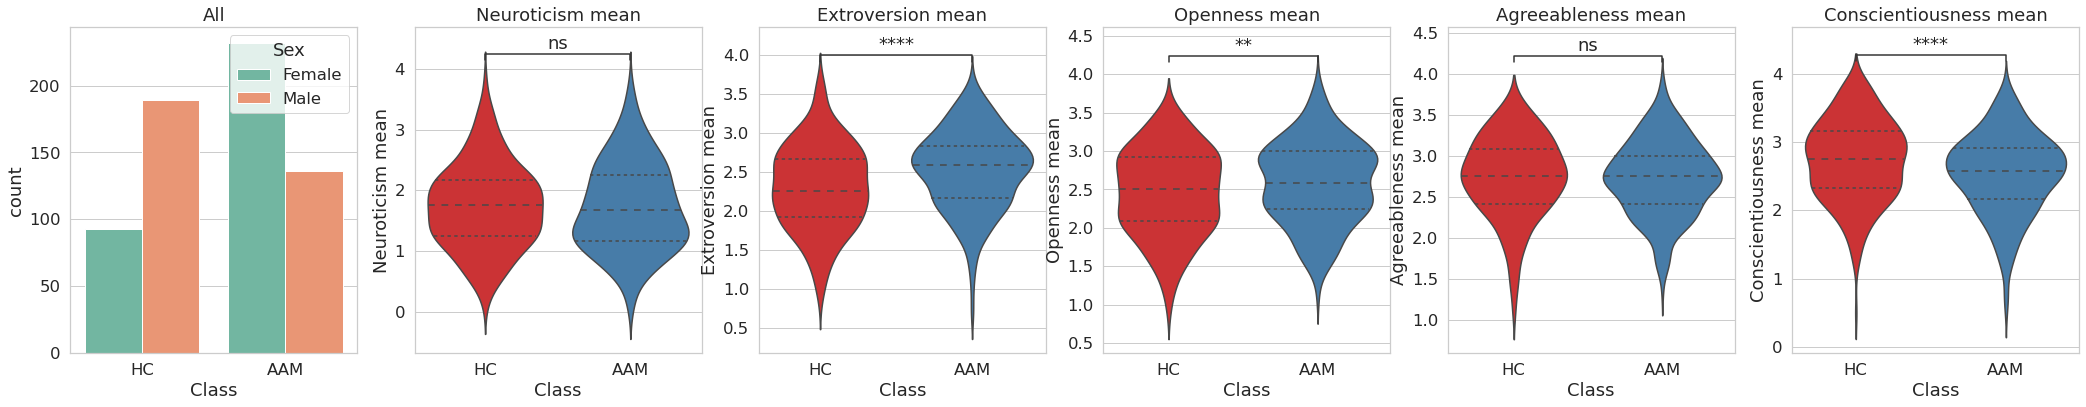

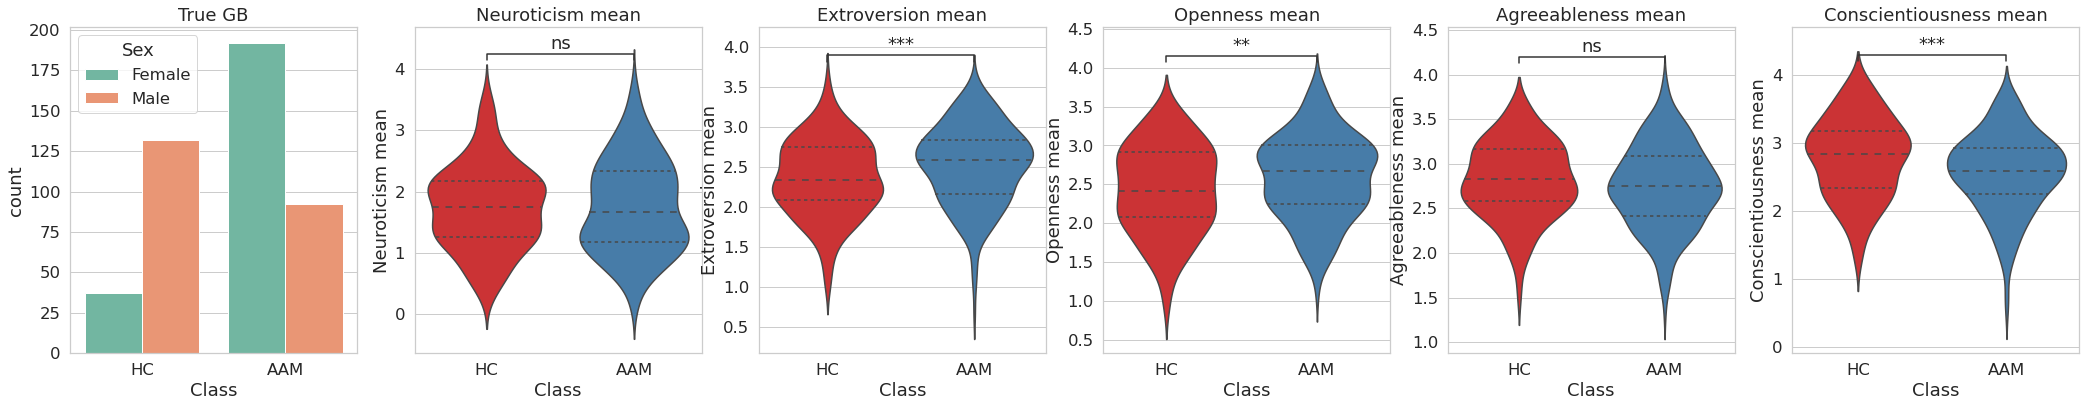

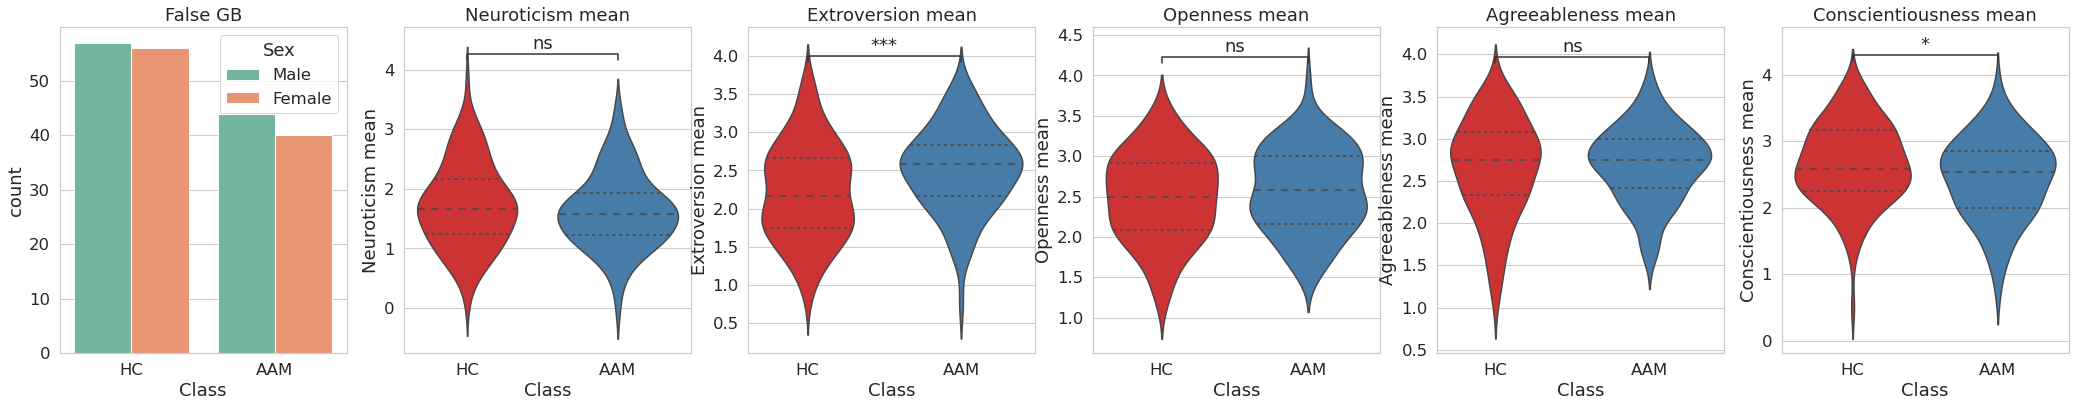

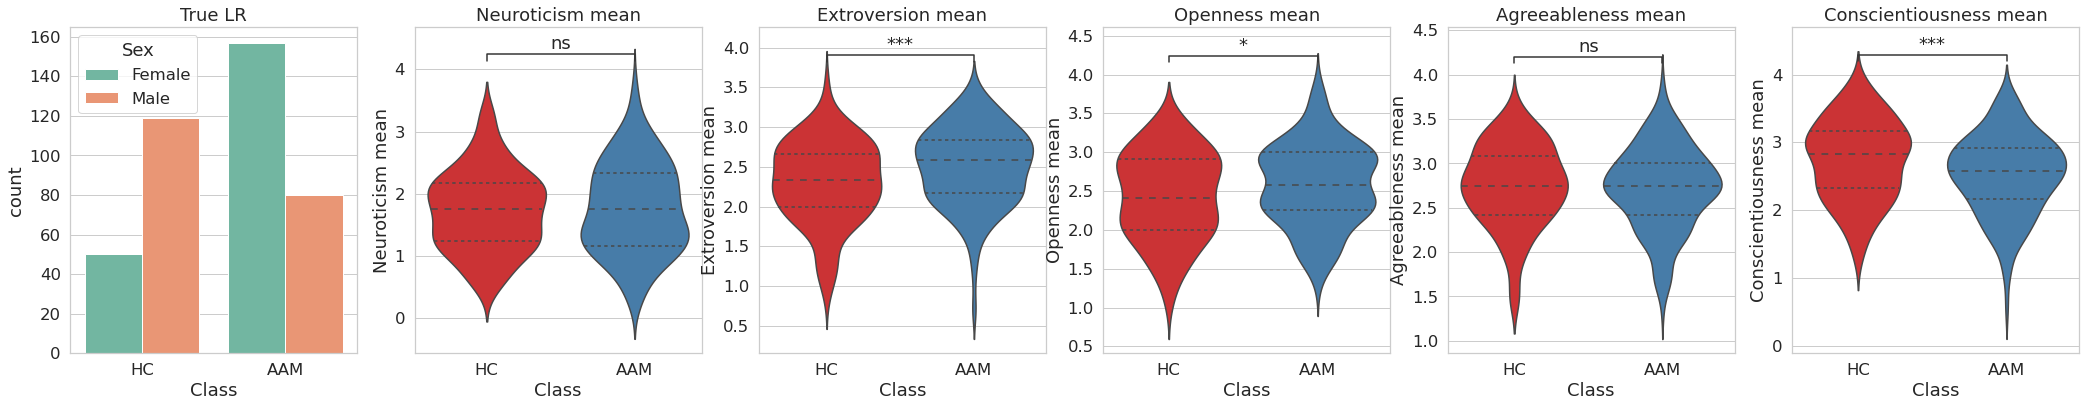

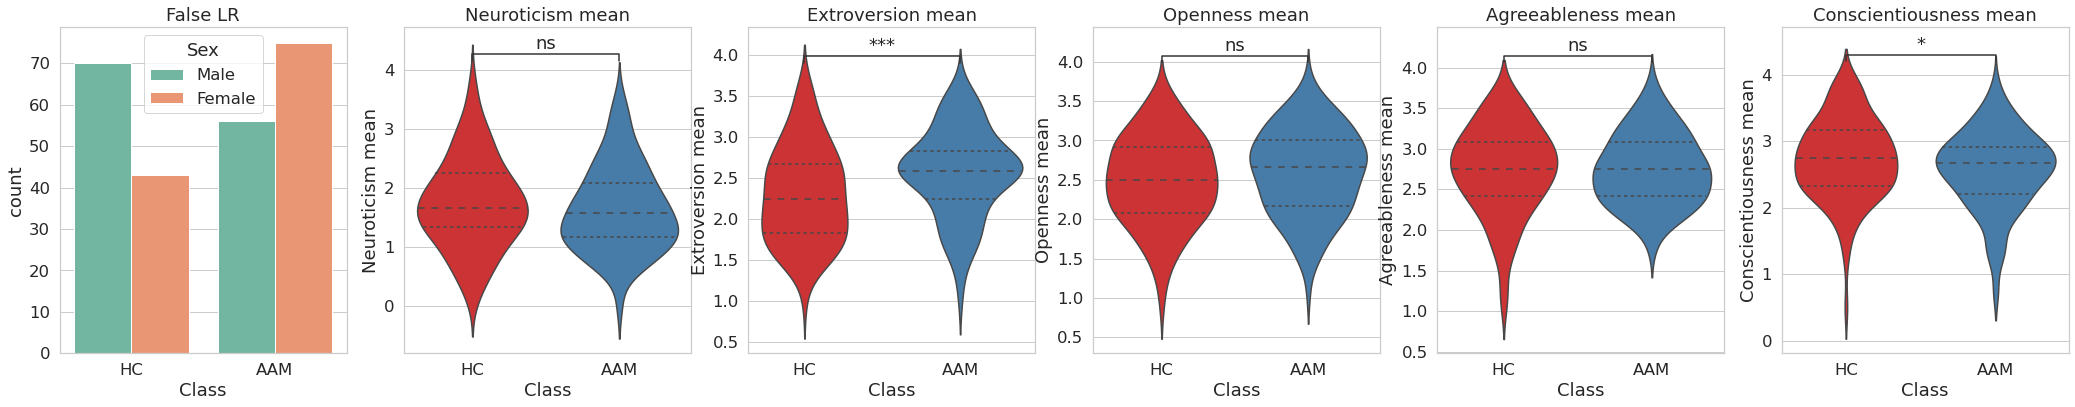

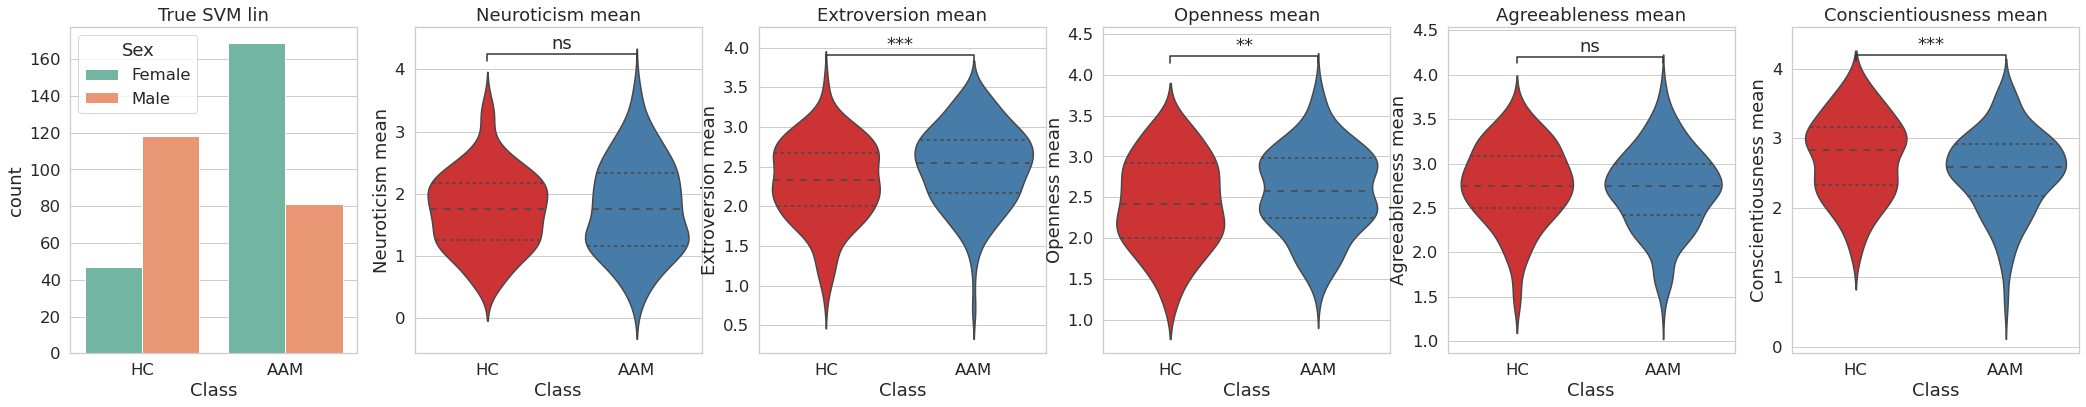

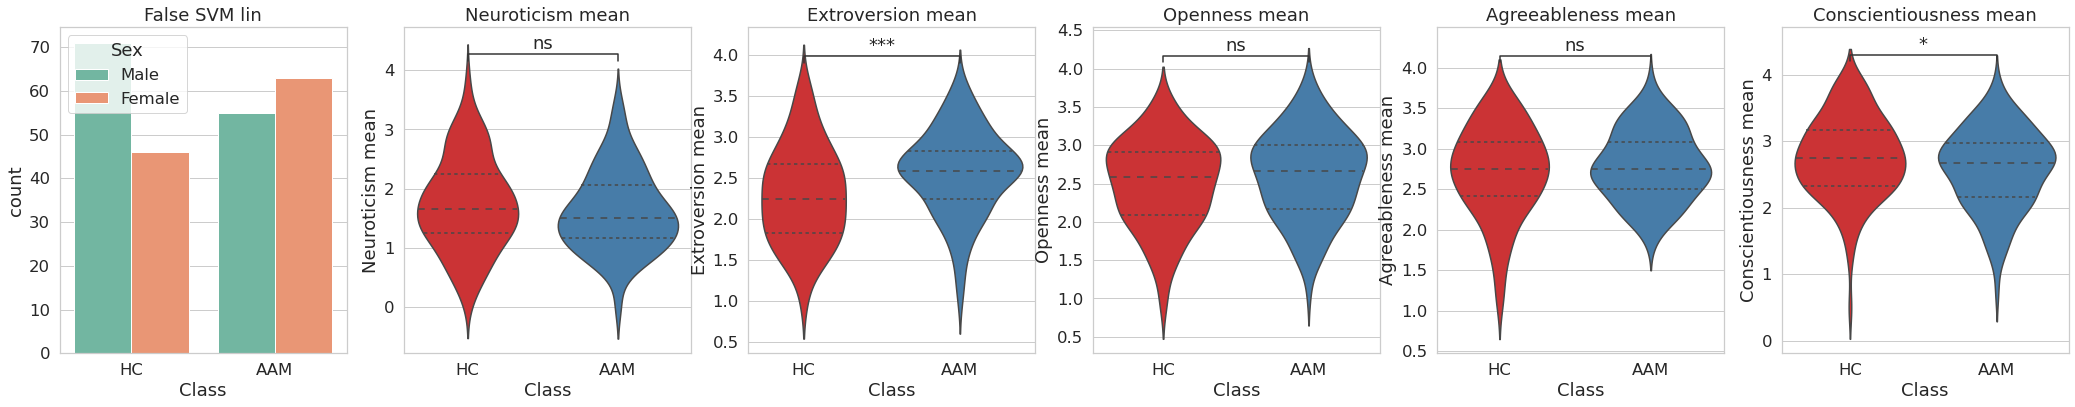

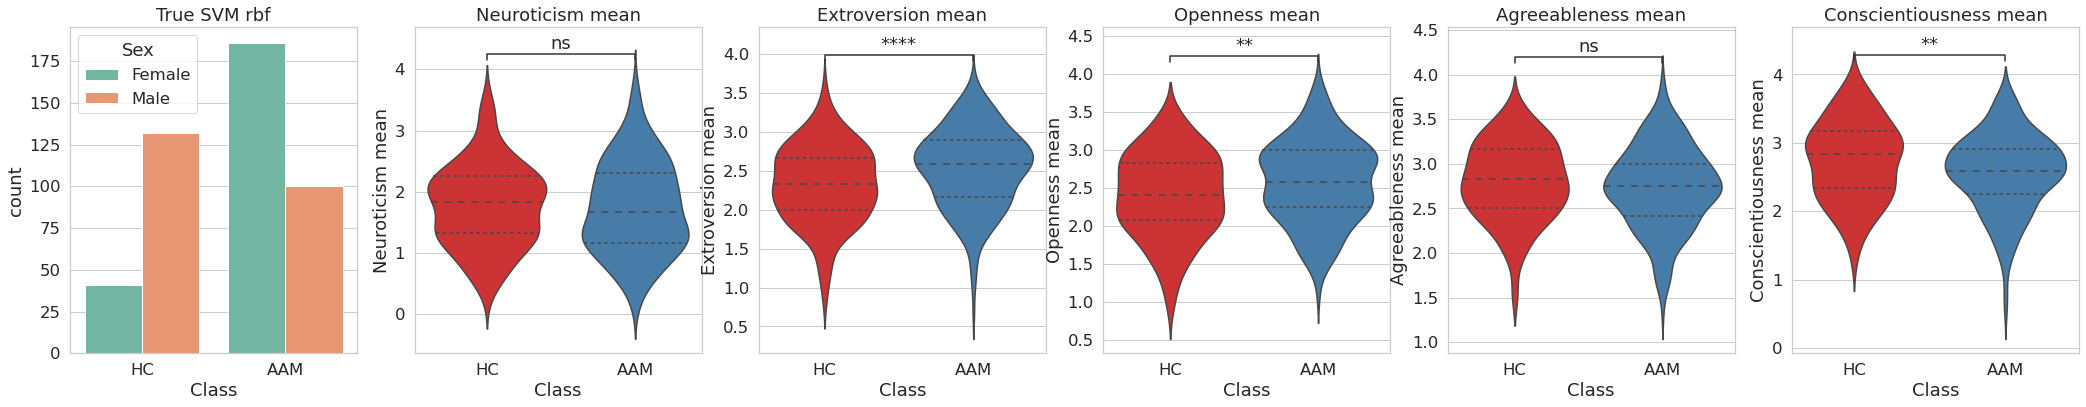

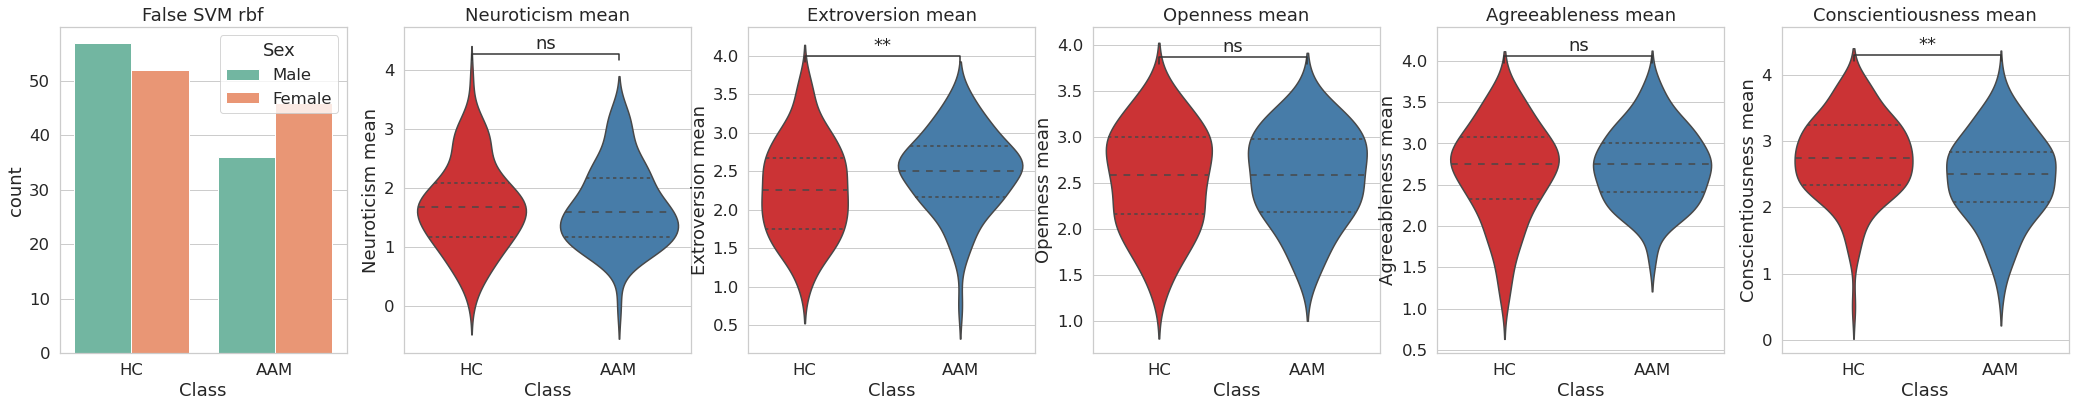

In [21]:
for (S, DF2) in [('All', binge_NEO),
                ('True GB', binge_NEO.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_NEO.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_NEO.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_NEO.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:5]
    
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [22]:
binge_NEO = binge_NEO_FU2

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=4.261e-01 stat=-7.965e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=8.633e-08 stat=-5.423e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.845e-02 stat=-2.197e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with

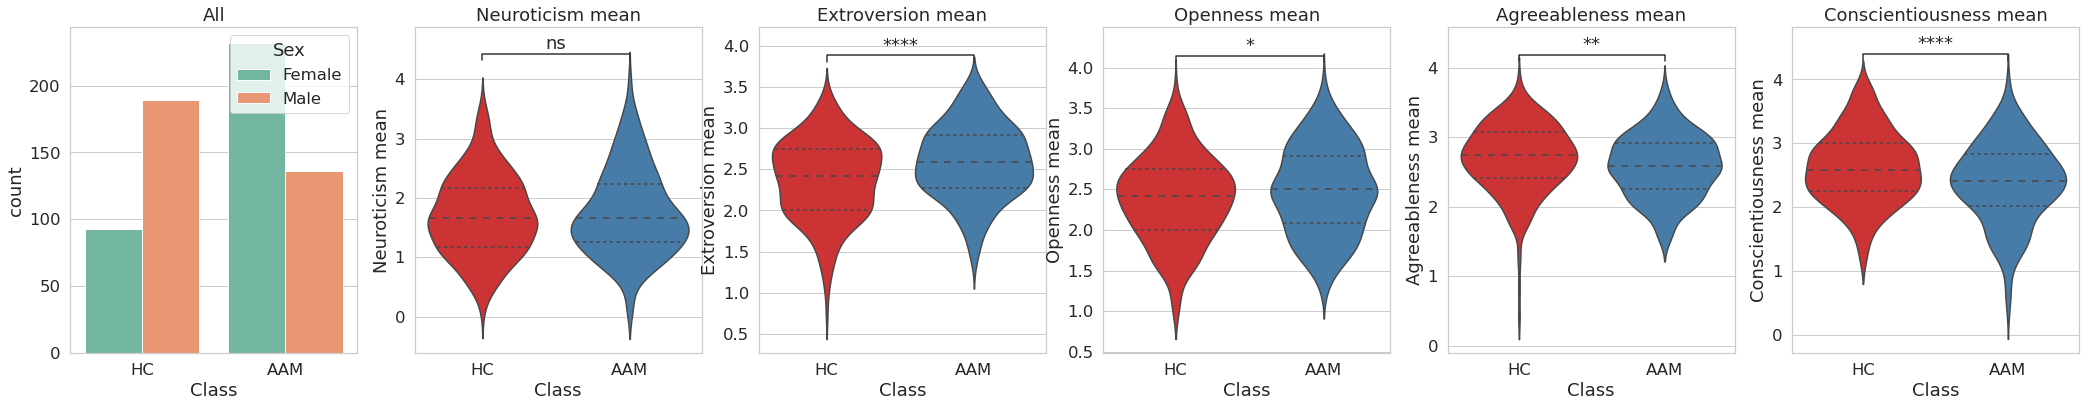

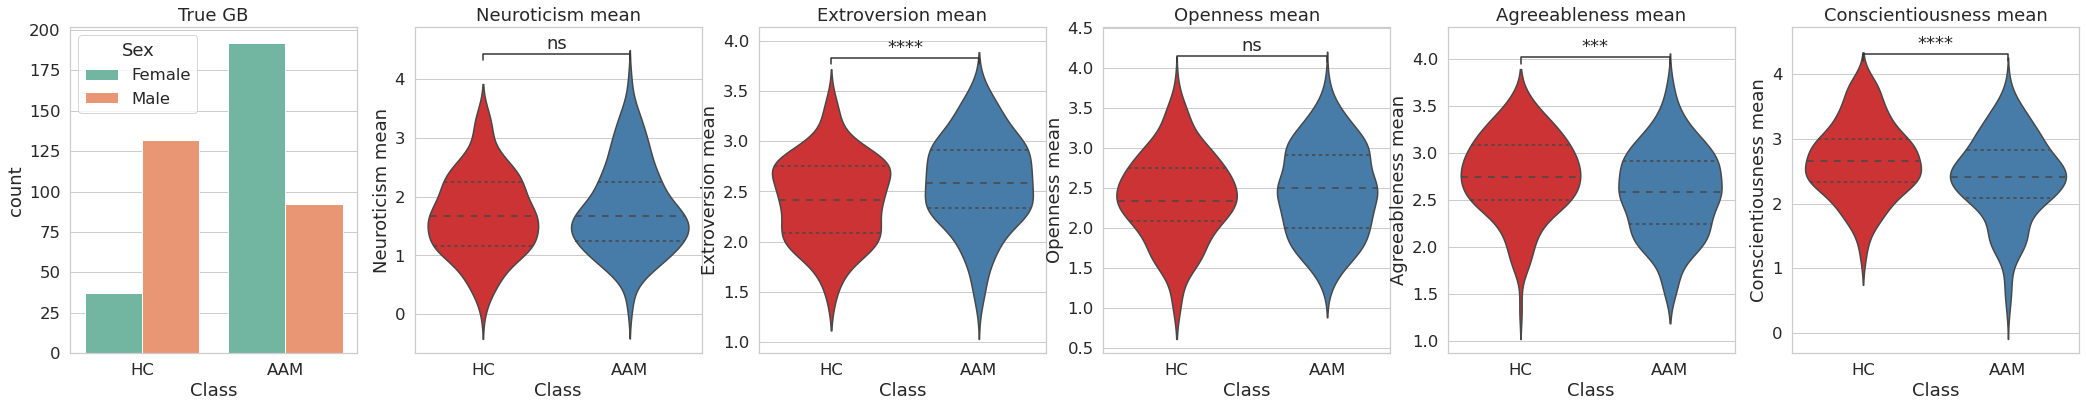

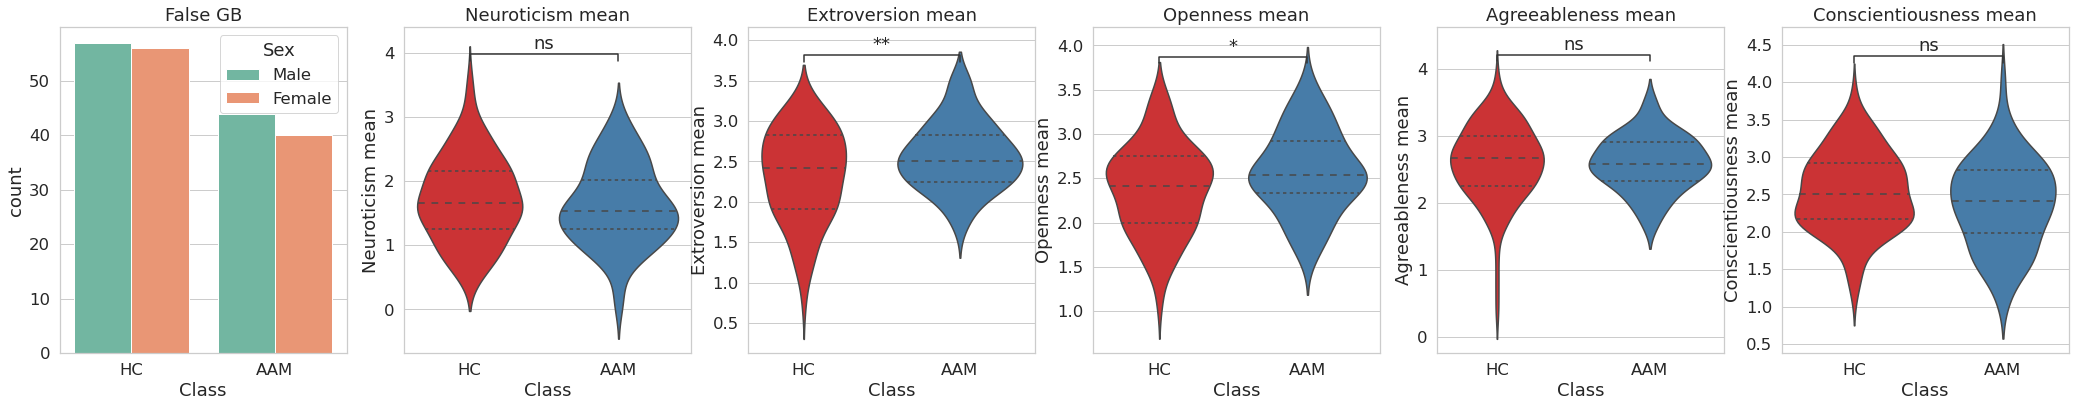

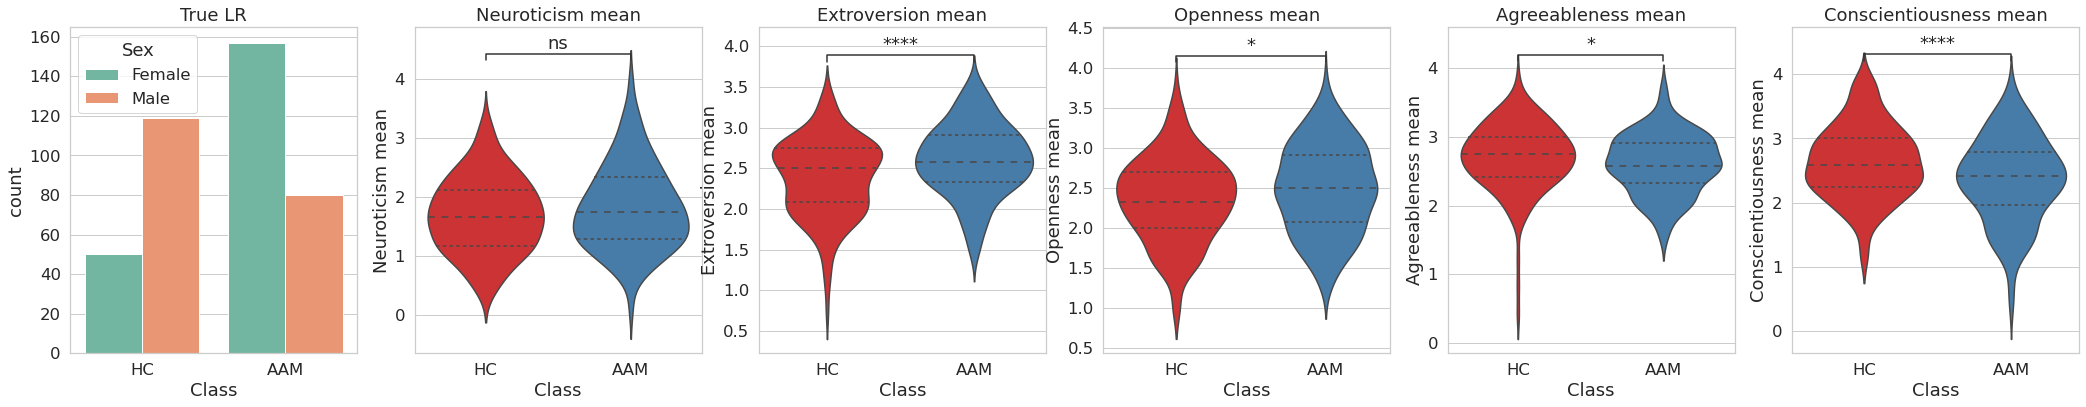

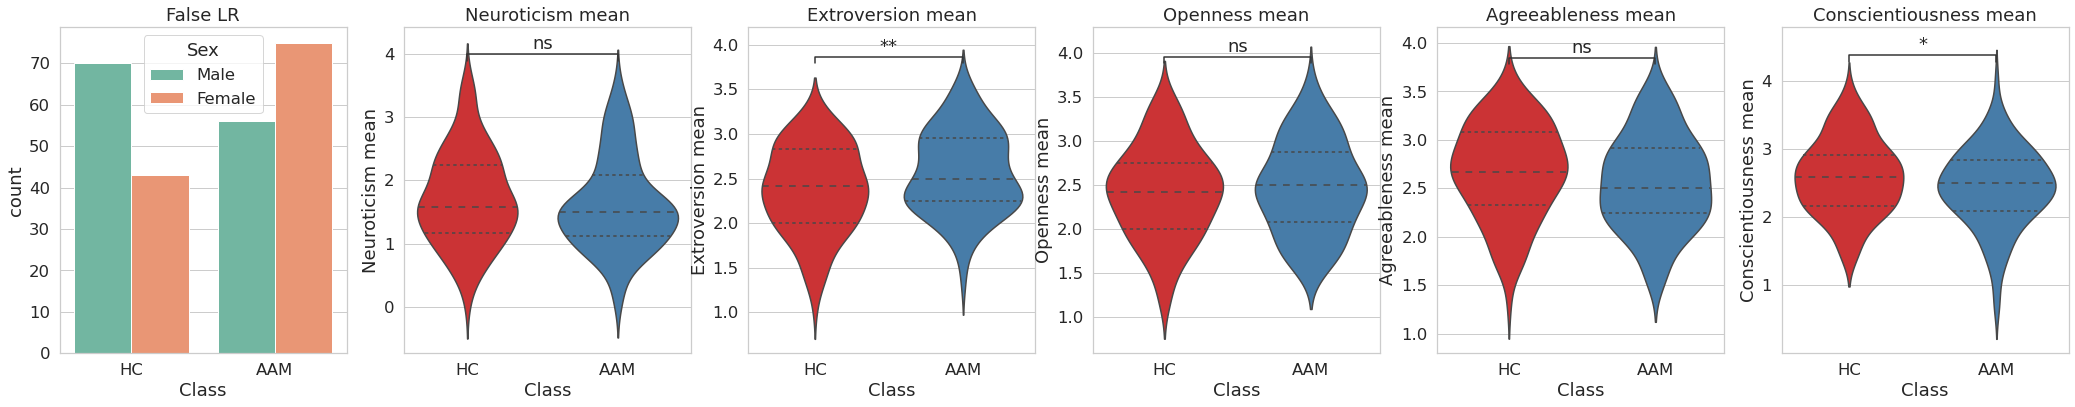

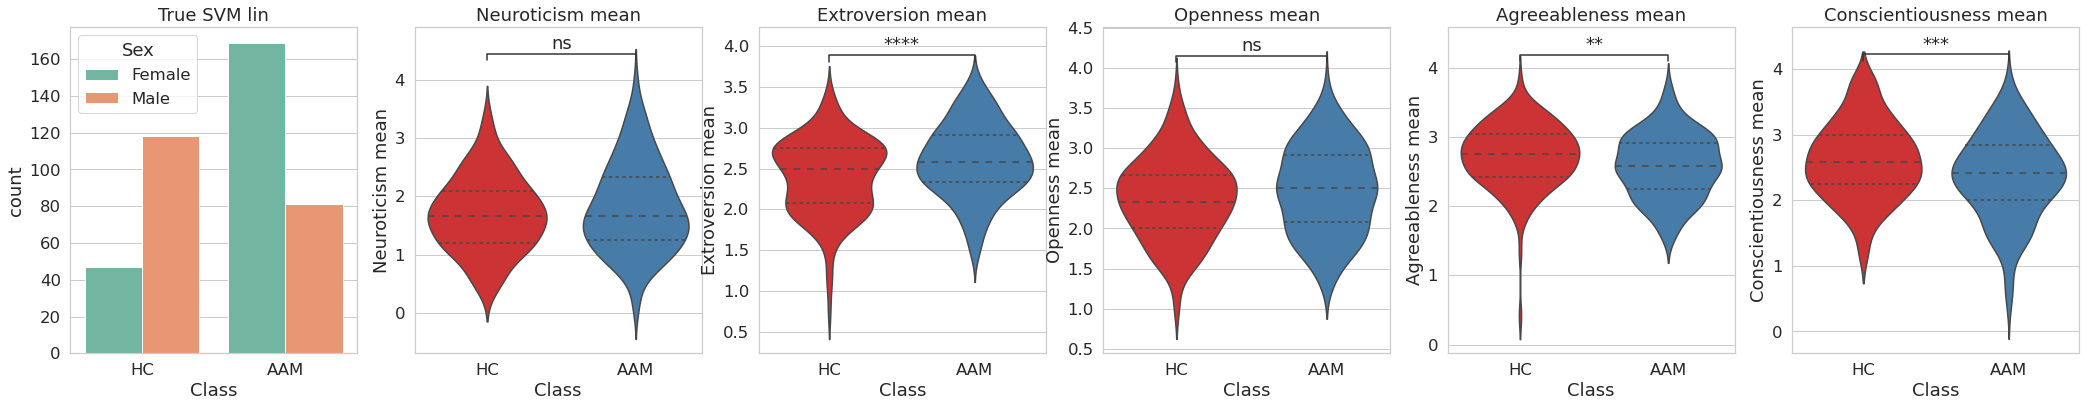

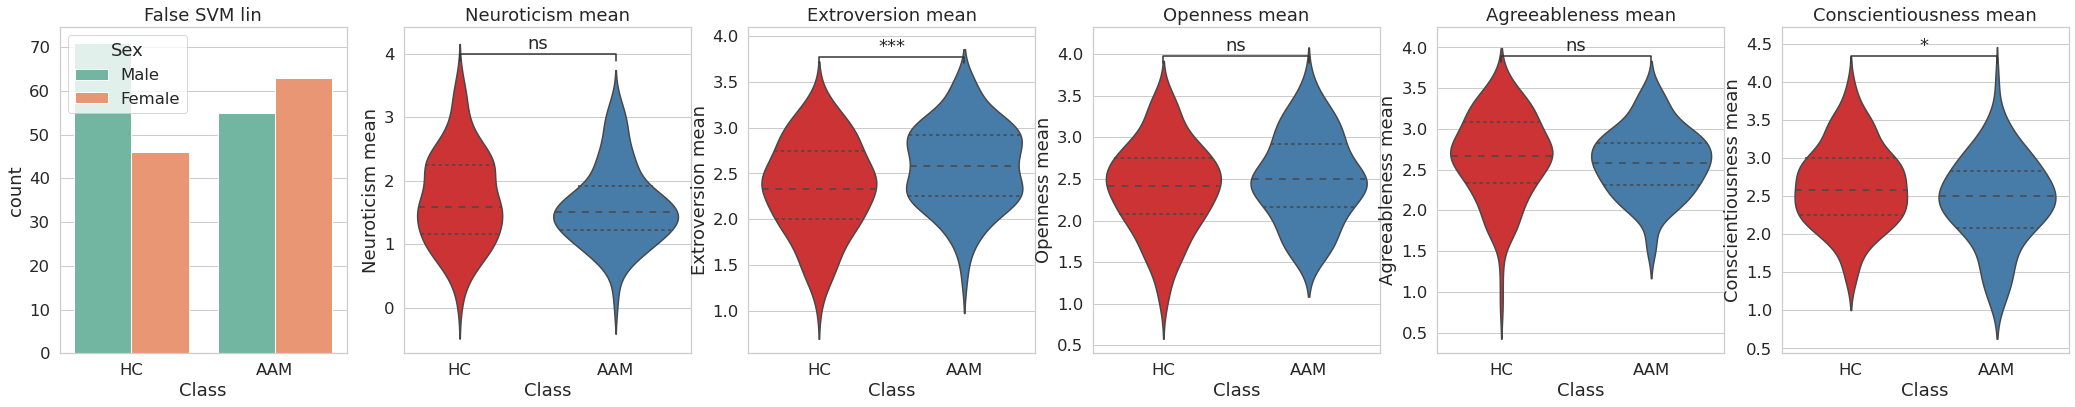

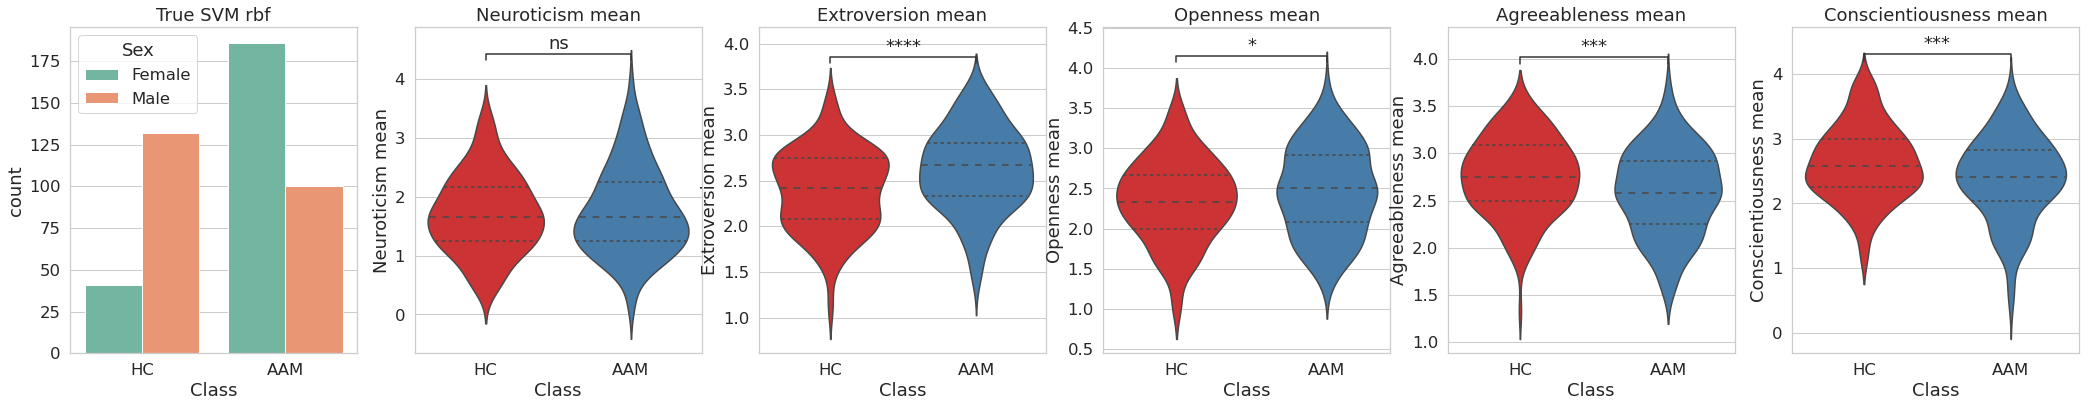

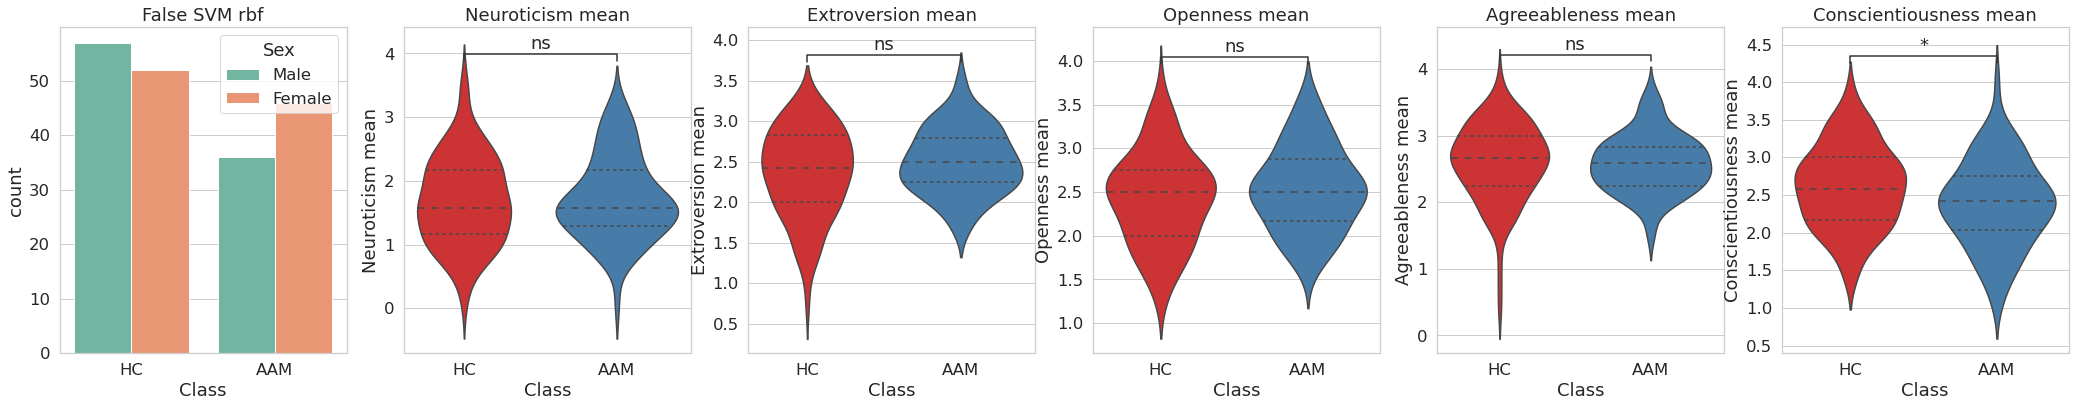

In [23]:
for (S, DF2) in [('All', binge_NEO),
                ('True GB', binge_NEO.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_NEO.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_NEO.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_NEO.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:5]
    
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [24]:
binge_NEO = binge_NEO_FU1

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=9.489e-02 stat=1.673e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.726e-10 stat=-6.503e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=4.198e-01 stat=-8.073e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with 

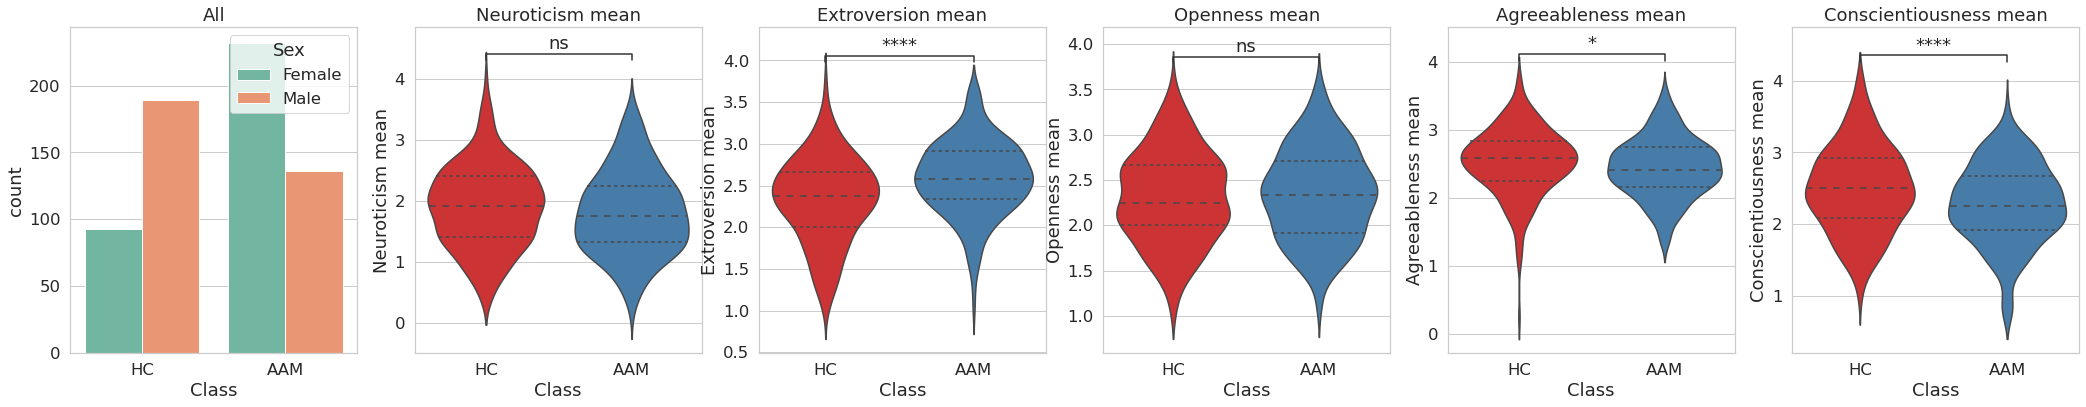

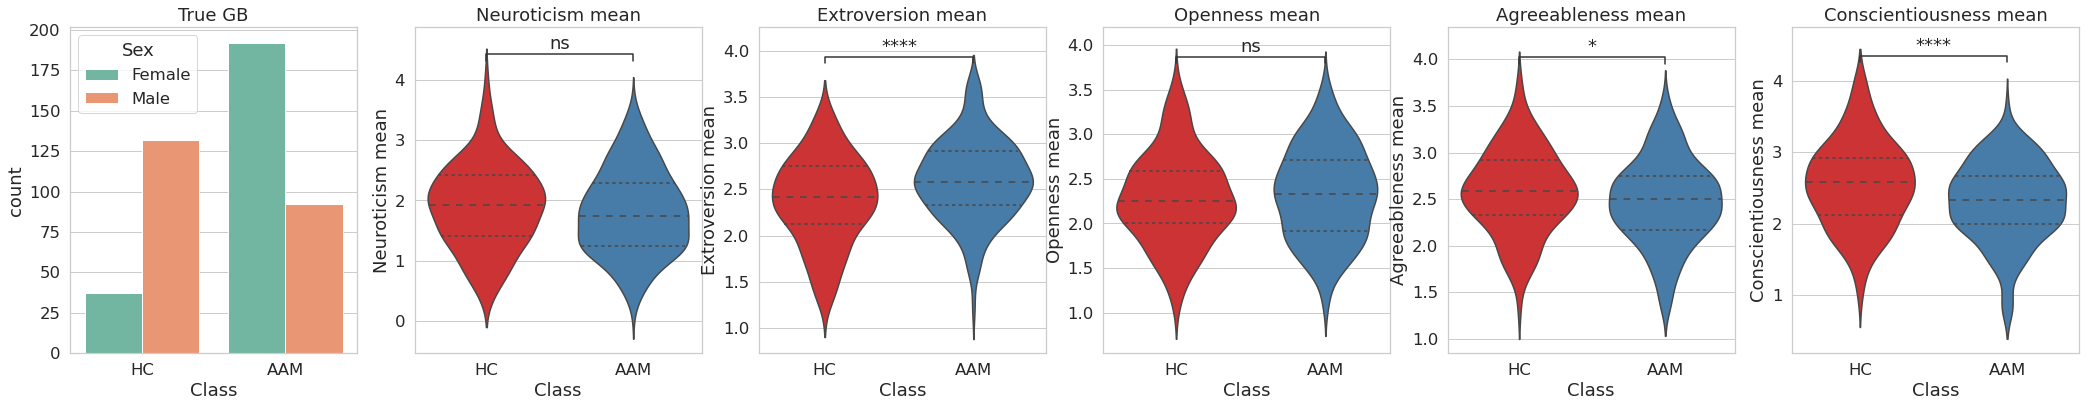

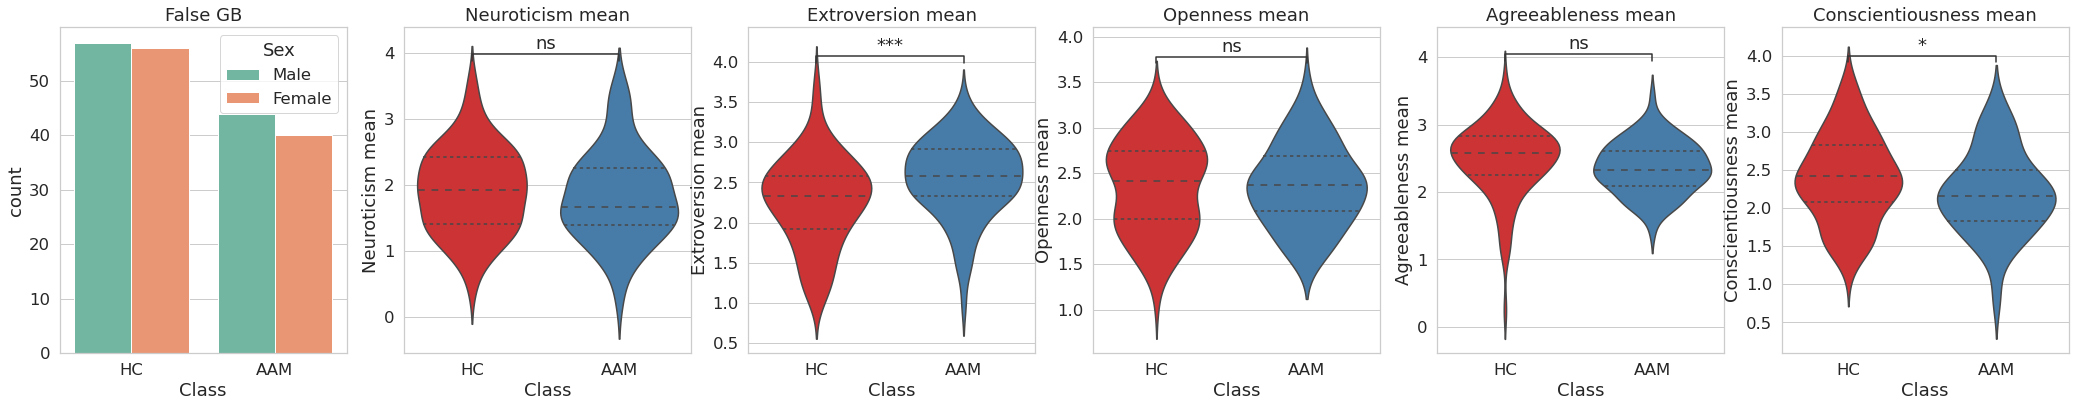

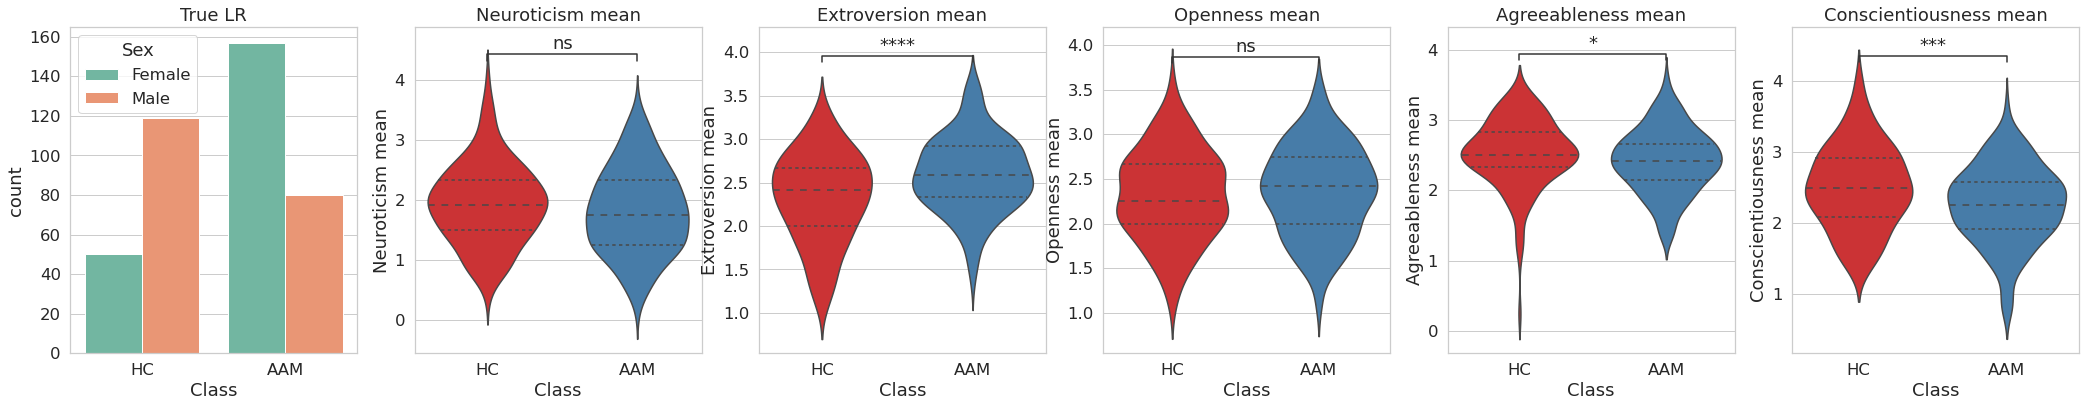

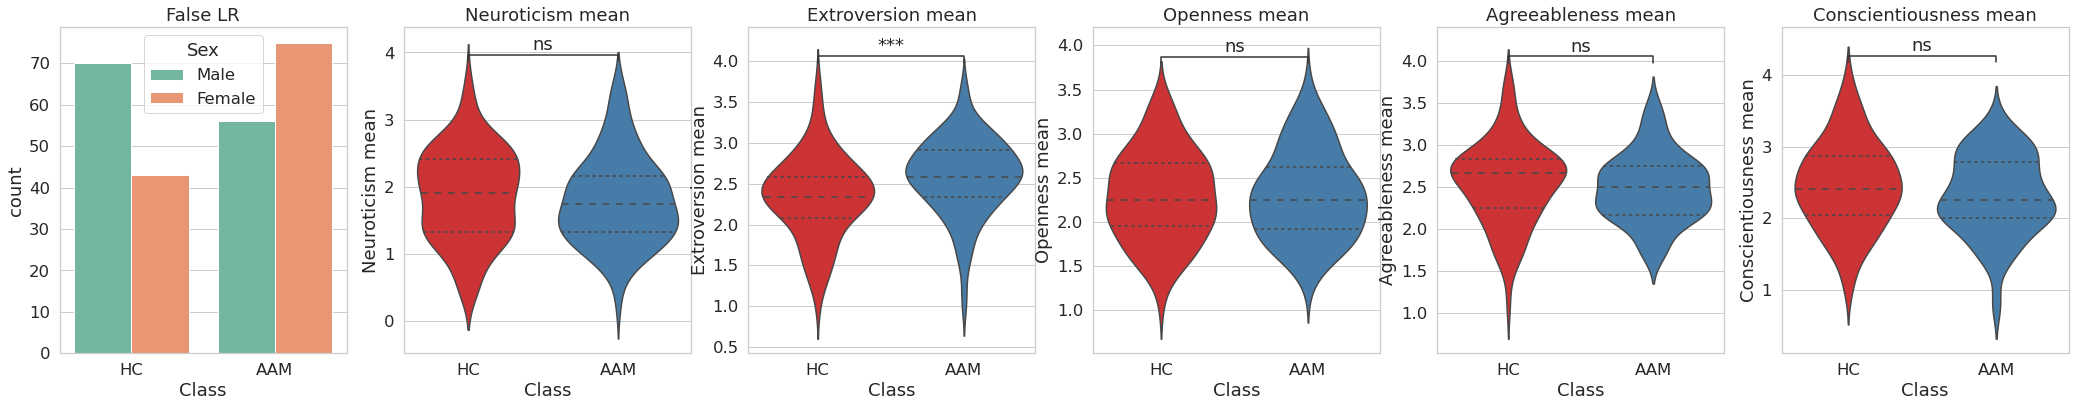

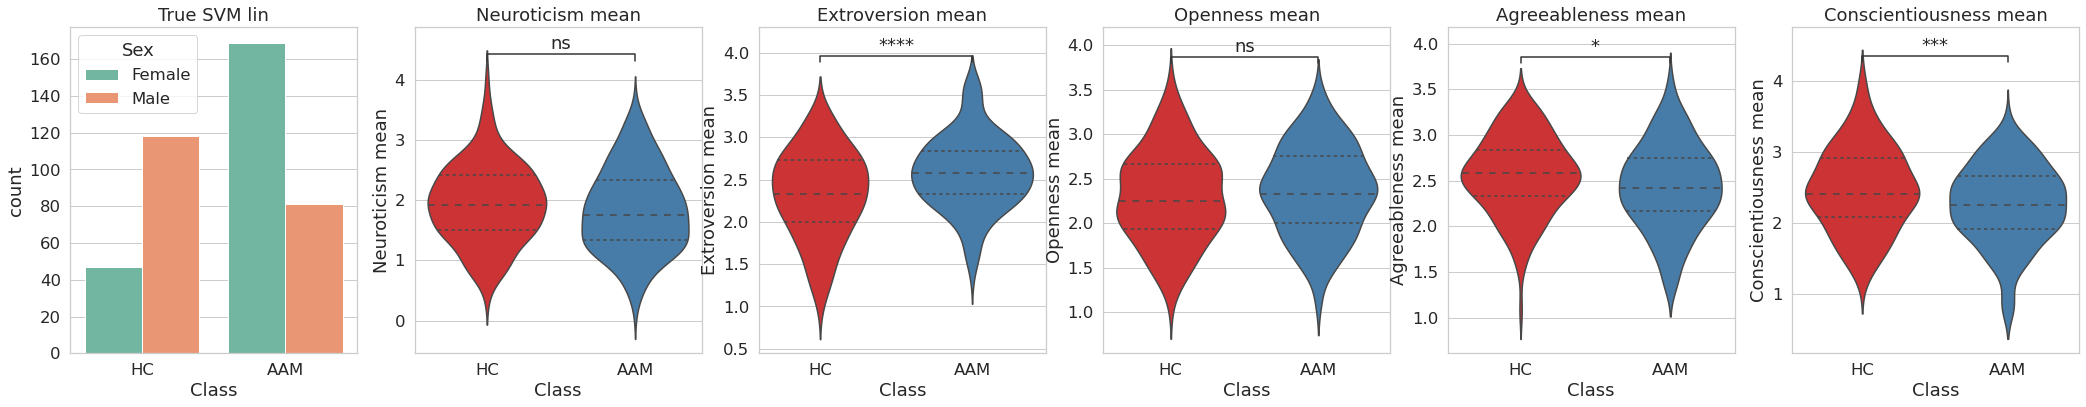

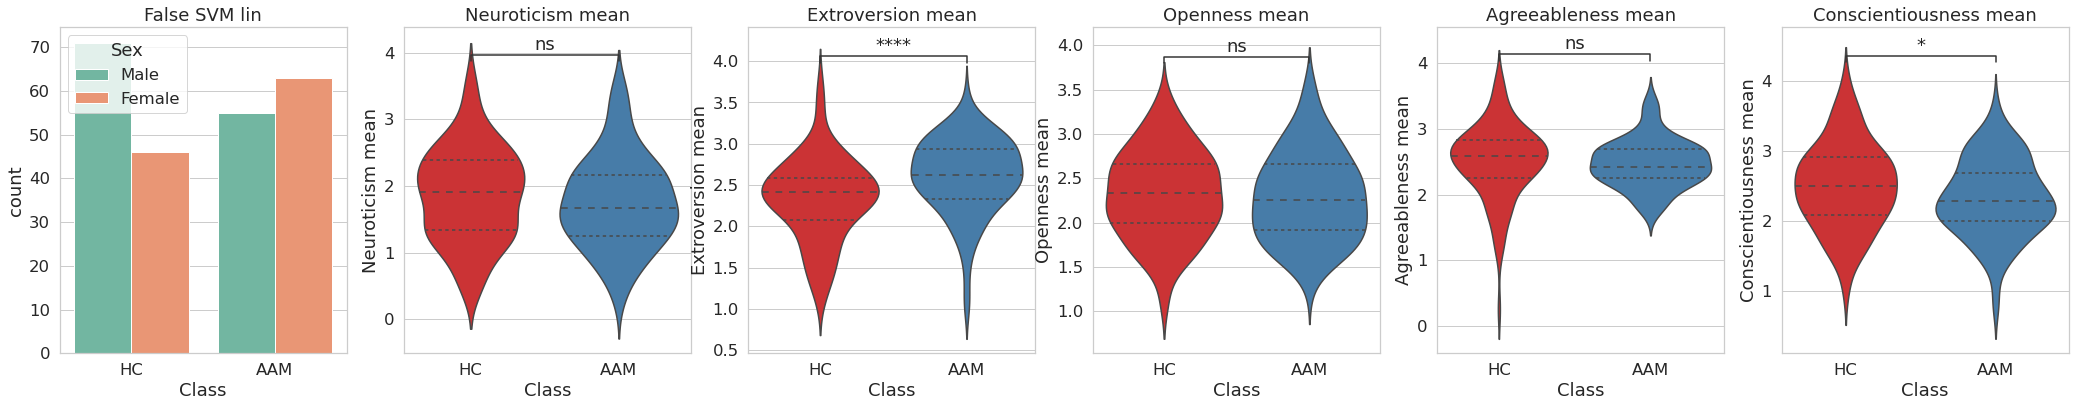

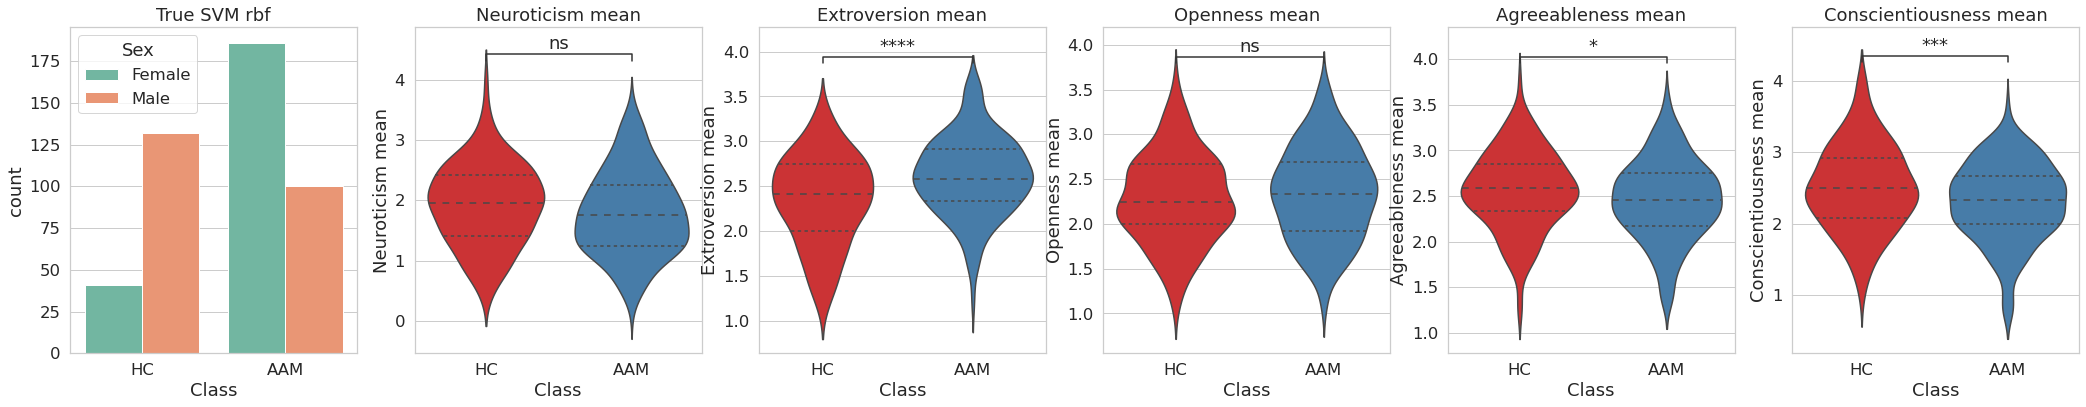

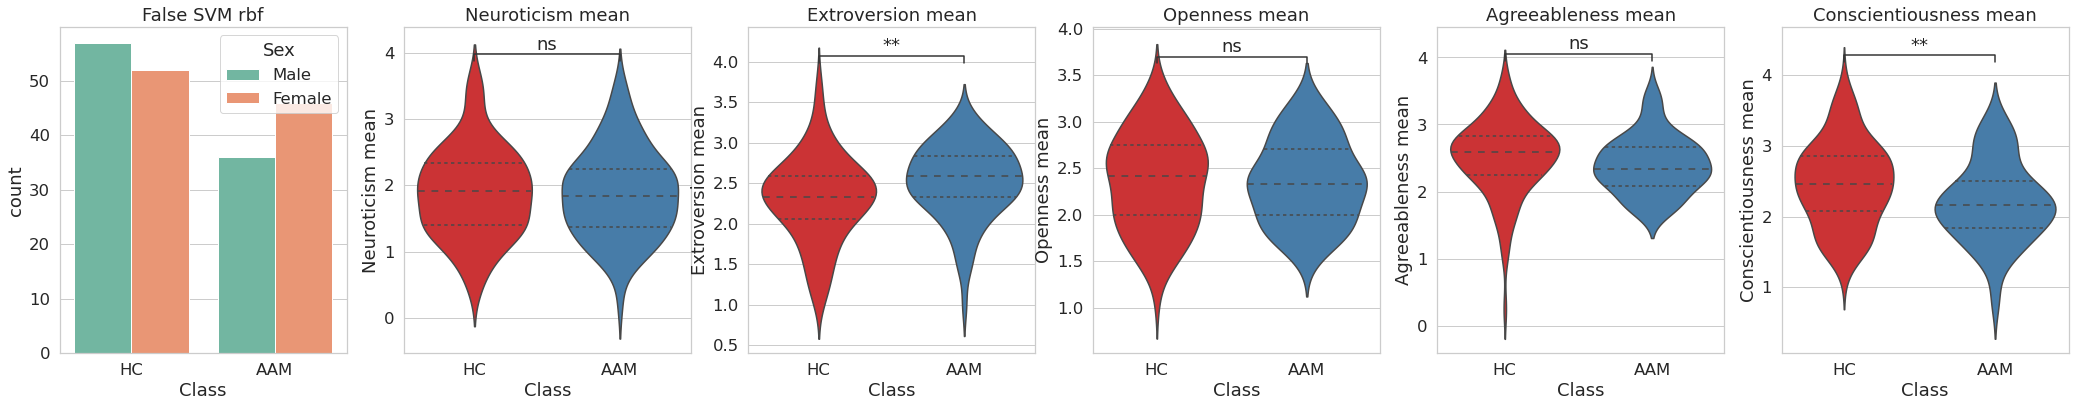

In [25]:
for (S, DF2) in [('All', binge_NEO),
                ('True GB', binge_NEO.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_NEO.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_NEO.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_NEO.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:5]
    
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [26]:
binge_NEO = binge_NEO_BL

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.823e-02 stat=1.764e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.110e-07 stat=-5.368e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=8.462e-01 stat=1.940e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with B

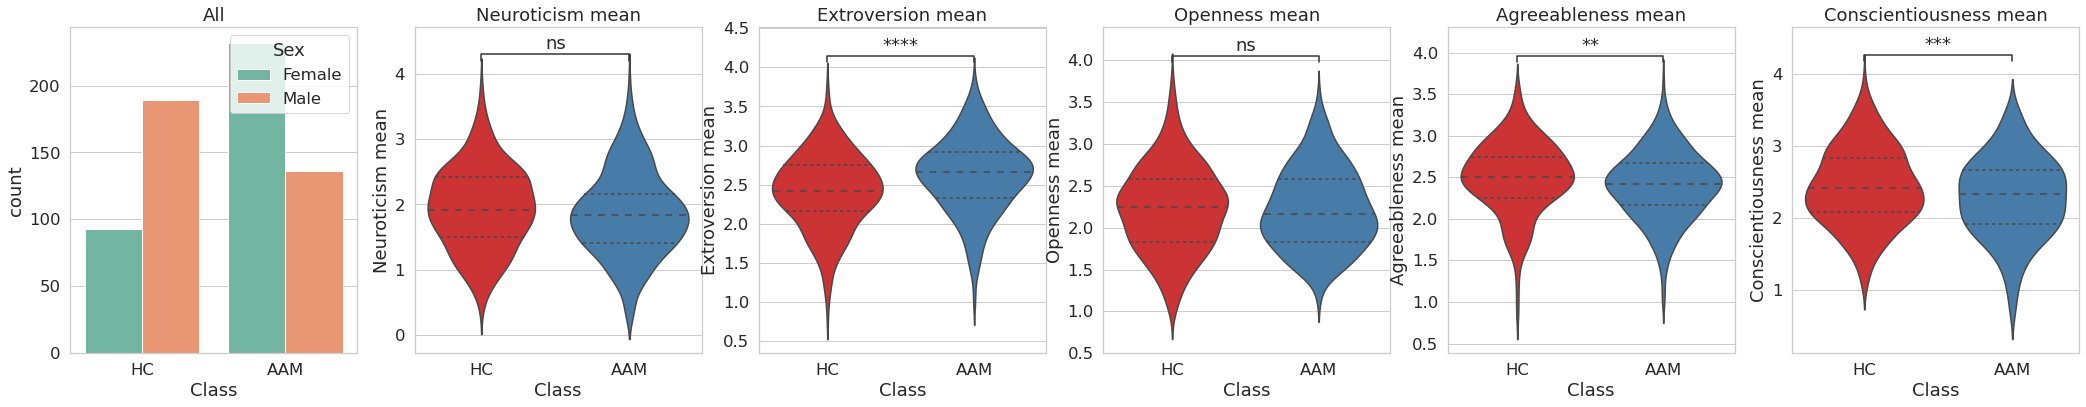

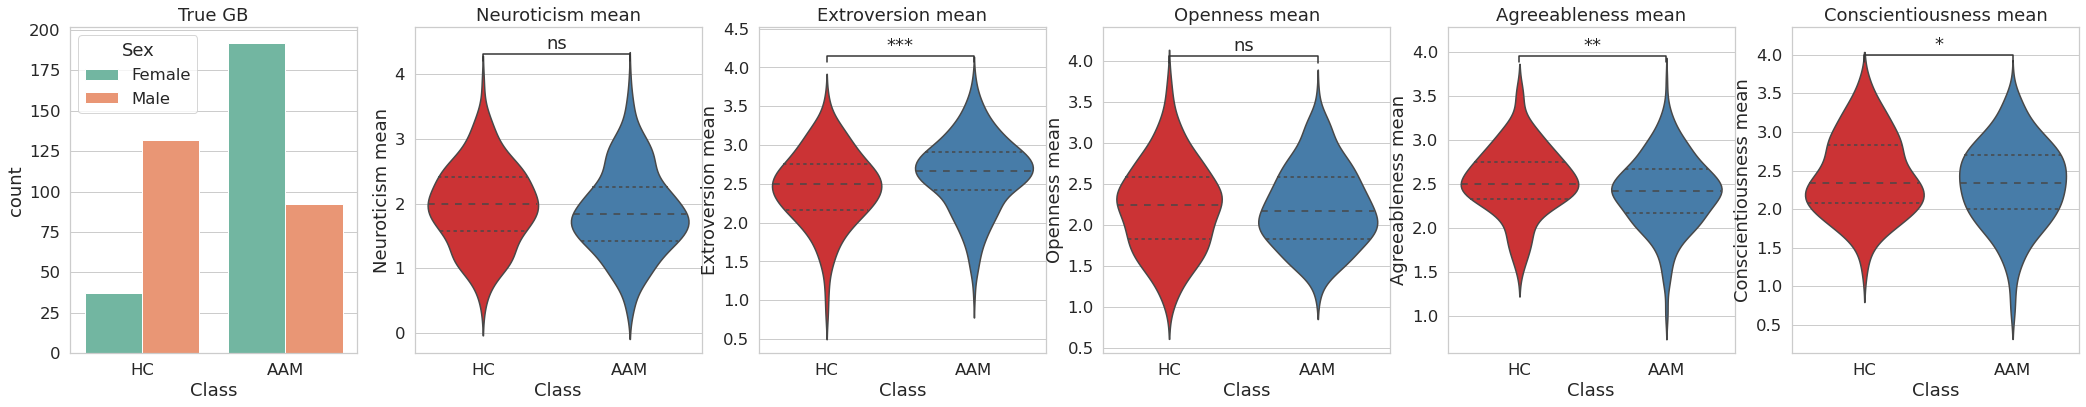

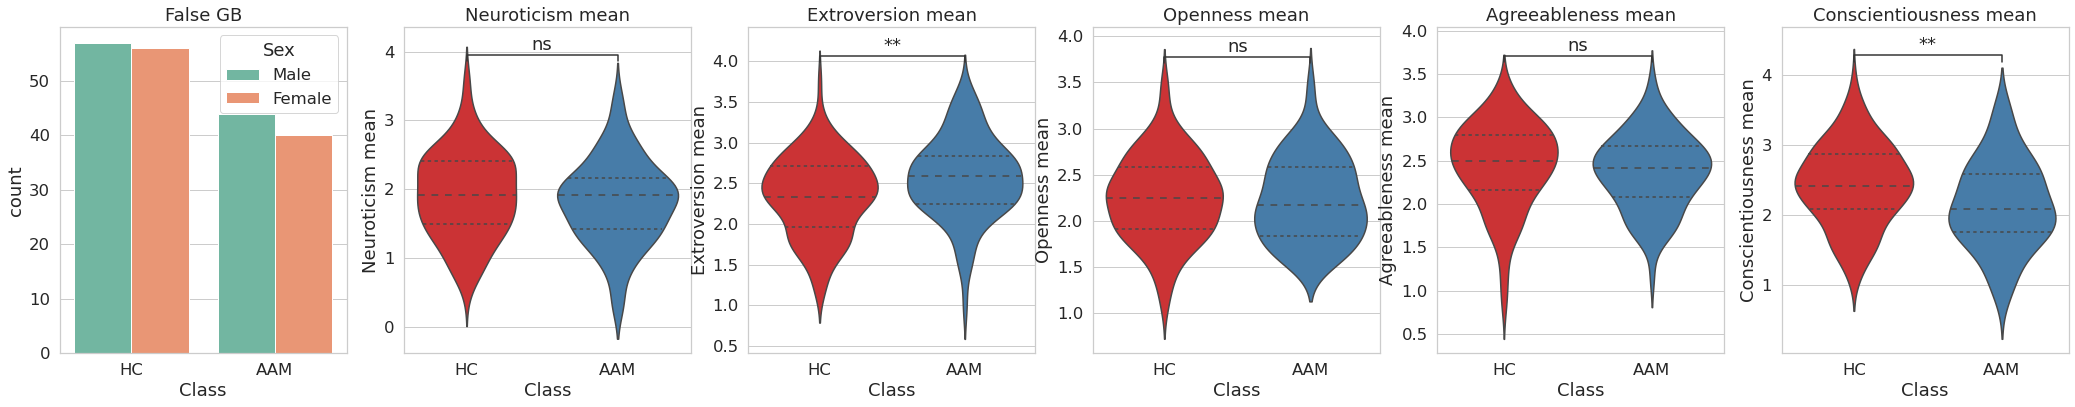

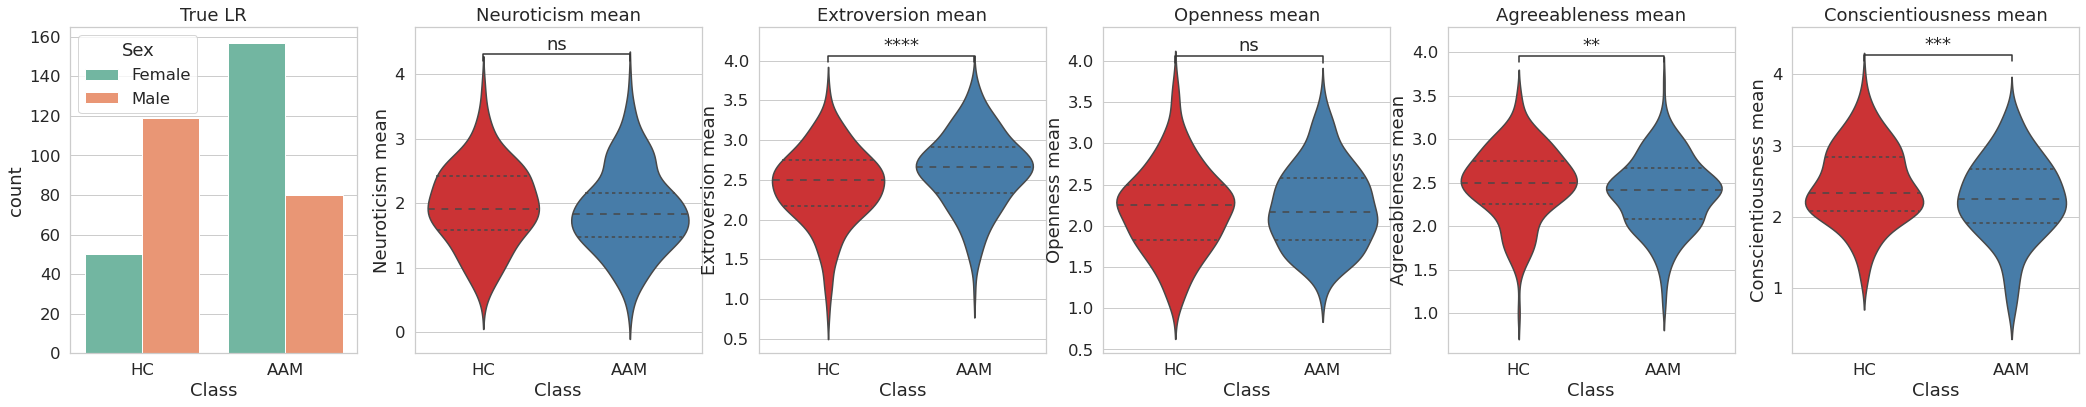

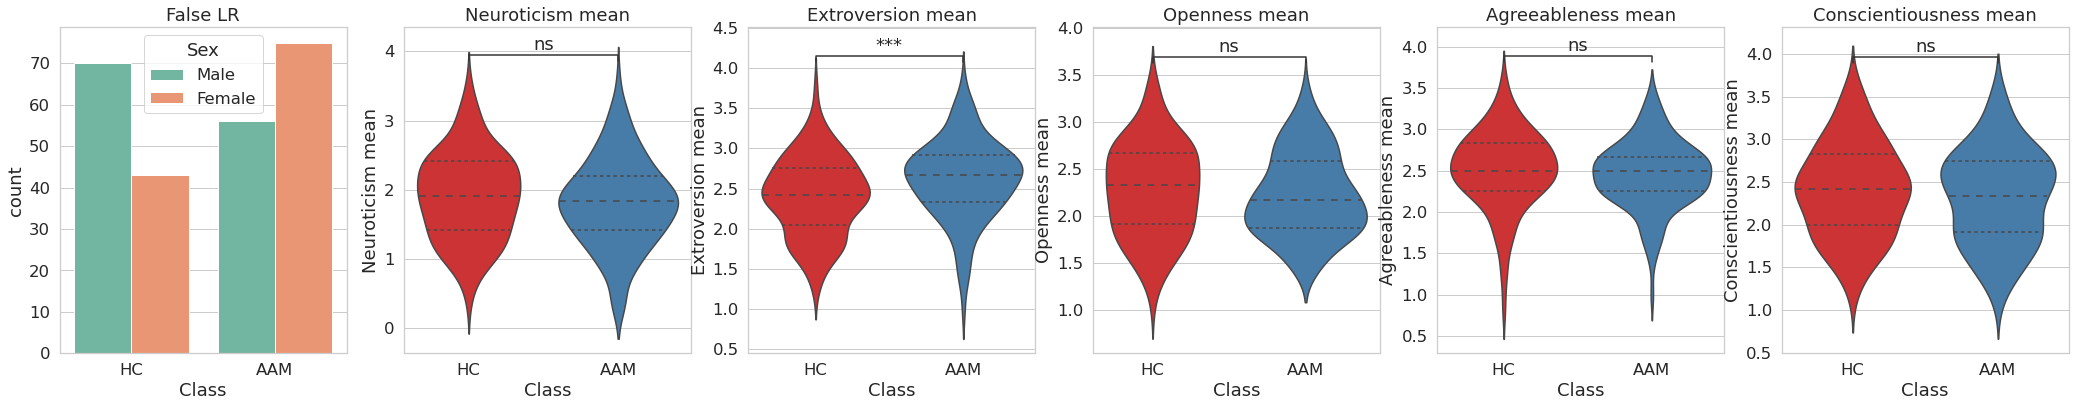

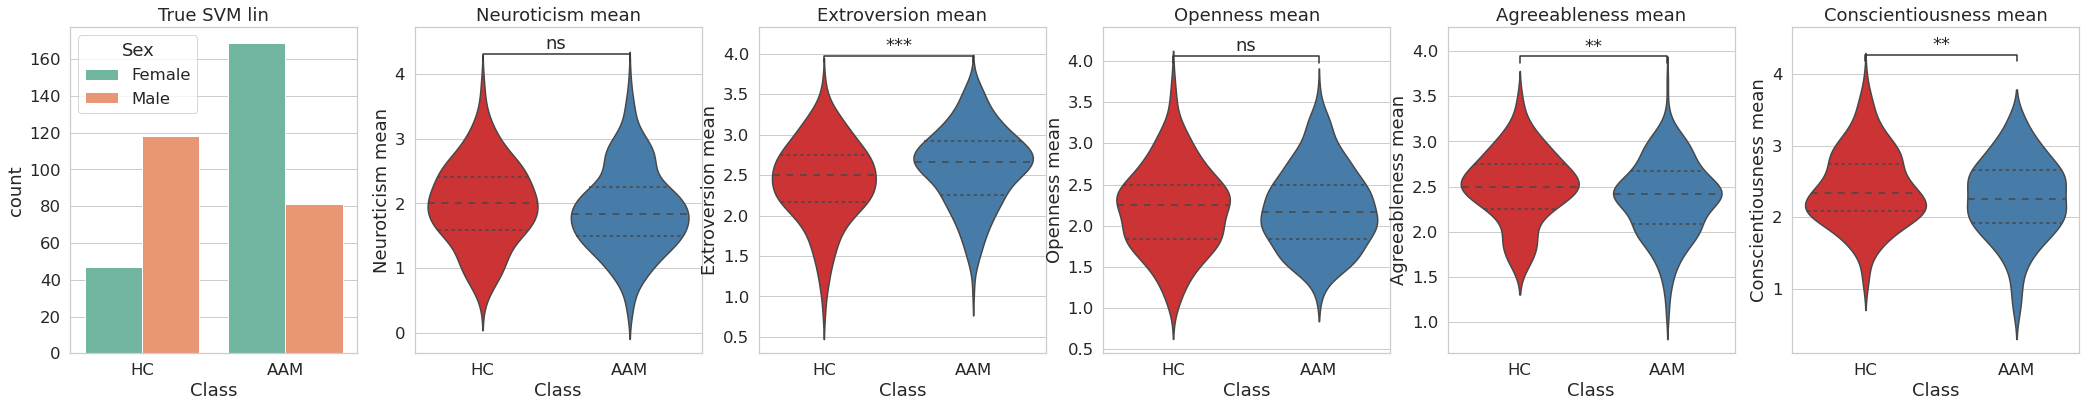

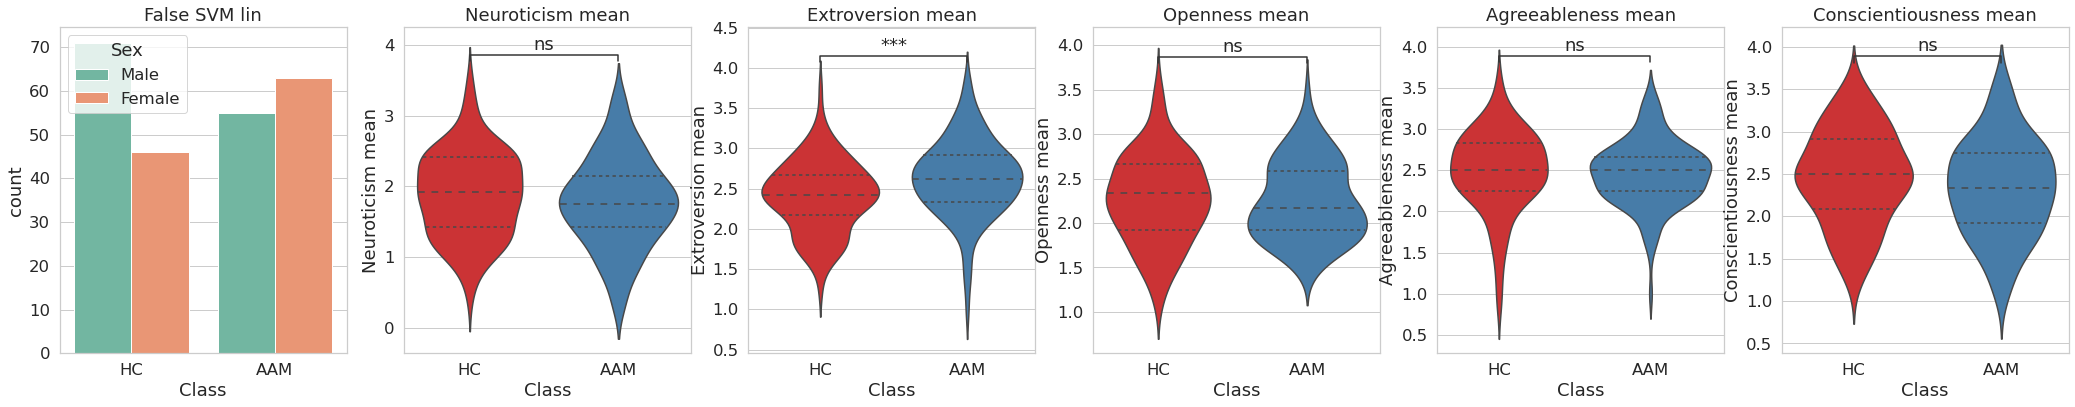

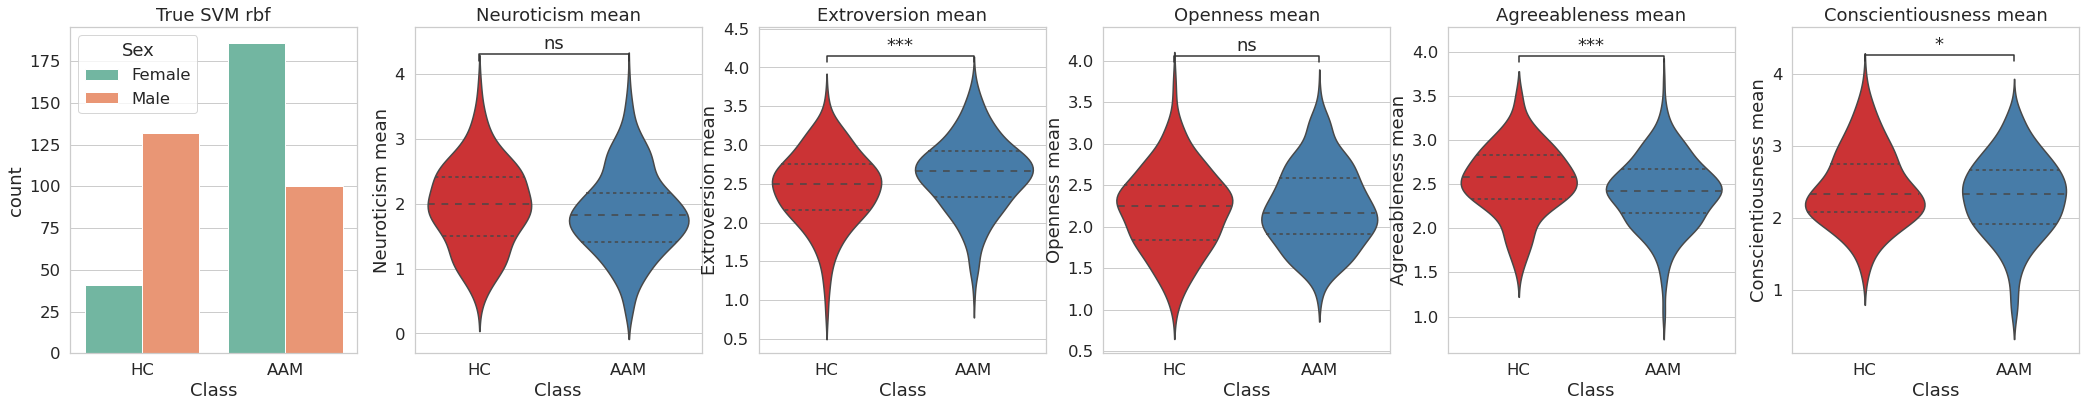

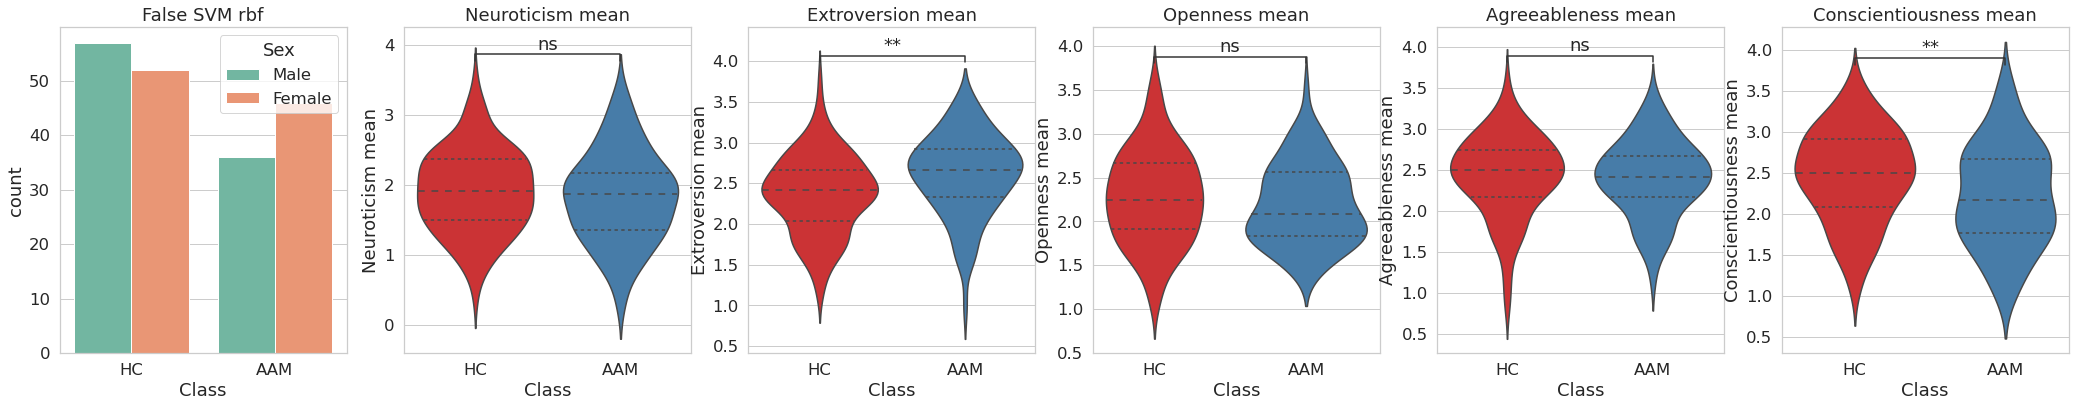

In [27]:
for (S, DF2) in [('All', binge_NEO),
                ('True GB', binge_NEO.set_index('ID').loc[GB_T, :]),
                ('False GB', binge_NEO.set_index('ID').loc[GB_F, :]),
                ('True LR', binge_NEO.set_index('ID').loc[LR_T, :]),
                ('False LR', binge_NEO.set_index('ID').loc[LR_F, :]),
                ('True SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_T, :]),
                ('False SVM lin', binge_NEO.set_index('ID').loc[SVM_lin_F, :]),
                ('True SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_T, :]),
                ('False SVM rbf', binge_NEO.set_index('ID').loc[SVM_rbf_F, :])]:
    columns = DF2.columns[:5]
    
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 